In [17]:
import pandas as pd
from sqlalchemy import create_engine
from tqdm import tqdm
import urllib
from sqlalchemy import text

tqdm.pandas()


import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.tsa.statespace.sarimax import SARIMAX


In [18]:

conn_string_odbc="Driver={ODBC Driver 18 for SQL Server};Server=tcp:smartspace.database.windows.net,1433;Database=connectionspace;Uid=stats170-G6;Pwd=cro-r5sweDlVay5t=eta;Encrypt=yes;TrustServerCertificate=no;Connection Timeout=30;"
params = urllib.parse.quote_plus(conn_string_odbc)
conn_str_formatted = 'mssql+pyodbc:///?odbc_connect={}'.format(params)
engine = create_engine(conn_str_formatted)

In [19]:
# fetch table names
conn = engine.connect()

query = text("SELECT * FROM INFORMATION_SCHEMA.TABLES WHERE TABLE_TYPE = 'BASE TABLE'")
result = conn.execute(query)
for row in result:
    print(row)

conn.close()

('connectionspace', 'dbo', 'region_to_space', 'BASE TABLE')
('connectionspace', 'dbo', 'processed_data_merged', 'BASE TABLE')
('connectionspace', 'dbo', 'class_schedule', 'BASE TABLE')
('connectionspace', 'dbo', 'dbh_space', 'BASE TABLE')
('connectionspace', 'dbo', 'processed_data4', 'BASE TABLE')
('connectionspace', 'dbo', 'space_groups', 'BASE TABLE')
('connectionspace', 'dbo', 'region_to_coverage', 'BASE TABLE')
('connectionspace', 'dbo', 'space_hierarchy', 'BASE TABLE')
('connectionspace', 'dbo', 'days_of_mac', 'BASE TABLE')
('connectionspace', 'dbo', 'lctr_complete', 'BASE TABLE')
('connectionspace', 'dbo', 'Processed_Data', 'BASE TABLE')
('connectionspace', 'dbo', 'enriched_result', 'BASE TABLE')
('connectionspace', 'dbo', 'sensor', 'BASE TABLE')
('connectionspace', 'dbo', 'space_types', 'BASE TABLE')
('connectionspace', 'dbo', 'processed_data3', 'BASE TABLE')


In [21]:
# fetch lctr_complete table
conn = engine.connect()

query = text("SELECT * FROM lctr_complete")
results = conn.execute(query)

rows = results.fetchall()
cols = results.keys()
df_processed_data3 = pd.DataFrame(rows, columns=cols)

conn.close()

df_processed_data3

In [ ]:
# Extract the last 4 characters from 'sensor' column and create a new column 'room'
df_processed_data3['room'] = df_processed_data3['predicted_region_name'].str[-4:]

# Get unique room values and sort them
unique_rooms = df_processed_data3['room'].unique()
unique_rooms_sorted = sorted(unique_rooms)

# Create a DataFrame with sorted unique room values
sorted_rooms_df = pd.DataFrame(unique_rooms_sorted, columns=['Room'])

# Print the sorted unique room values
sorted_rooms_df

,Room
0,1100
1,1200
2,1300
3,1412
4,1420
5,1422
6,1423
7,1425
8,1427
9,1429


In [ ]:
# Get unique predicted_region_name values and sort them
unique_predicted_region_names = df_processed_data3['predicted_region_name'].unique()
unique_predicted_region_names_sorted = sorted(unique_predicted_region_names)

# Create a DataFrame with sorted unique predicted_region_name values
sorted_predicted_region_names_df = pd.DataFrame(unique_predicted_region_names_sorted, columns=['Predicted Region Name'])

# Print the sorted unique predicted_region_name values
sorted_predicted_region_names_df

,Predicted Region Name
0,3141-clwa-1100
1,3141-clwa-1200
2,3141-clwa-1300
3,3141-clwa-1412
4,3141-clwa-1420
...,...
58,3146-clwa-6049
59,3146-clwa-6122
60,3146-clwa-6131
61,3146-clwa-6217


In [ ]:
# Set max_rows to None to display all rows
pd.set_option("display.max_rows", None)
print(sorted_predicted_region_names_df)


   Predicted Region Name
0         3141-clwa-1100
1         3141-clwa-1200
2         3141-clwa-1300
3         3141-clwa-1412
4         3141-clwa-1420
5         3141-clwa-1422
6         3141-clwa-1423
7         3141-clwa-1425
8         3141-clwa-1427
9         3141-clwa-1429
10        3141-clwa-1431
11        3141-clwa-1433
12        3141-clwa-1500
13        3141-clwa-1600
14        3141-clwb-1100
15        3141-clwb-1200
16        3141-clwb-1300
17        3141-clwc-1100
18        3141-clwd-1100
19        3141-clwe-1100
20        3142-clwa-2019
21        3142-clwa-2039
22        3142-clwa-2051
23        3142-clwa-2059
24        3142-clwa-2065
25        3142-clwa-2099
26        3142-clwa-2209
27        3142-clwa-2219
28        3142-clwa-2231
29        3143-clwa-3019
30        3143-clwa-3039
31        3143-clwa-3051
32        3143-clwa-3059
33        3143-clwa-3065
34        3143-clwa-3099
35        3143-clwa-3209
36        3143-clwa-3219
37        3143-clwa-3231
38        3144-clwa-4019


In [ ]:

# # Check for rows where 'sensor' is different from 'predicted_region_name'
# different_values = df_processed_data3[df_processed_data3['sensor'] != df_processed_data3['predicted_region_name']]

# # Print the rows with different values
# print(different_values)

# #2mill different predictions


In [ ]:


# Rename the 'connection_time' column to 'startTimeStamp'
df_processed_data3.rename(columns={'connection_time': 'startTimestamp'}, inplace=True)

In [ ]:

from datetime import datetime
calendar17_18_19 = {
    "summer17": [datetime(2017, 6, 26), datetime(2017, 9, 13), datetime(2017, 9, 25)],
    "f17": [datetime(2017, 9, 25), datetime(2017, 12, 15), datetime(2018, 1,  3)],
    "w18": [datetime(2018, 1,  3), datetime(2018,  3, 23), datetime(2018, 3, 28)],
    "s18": [datetime(2018, 3, 28), datetime(2018,  6, 15), datetime(2018, 9, 24)],
    "summer18": [datetime(2018, 6, 25), datetime(2018, 9, 12), datetime(2018, 9, 24)],
    "f18": [datetime(2018, 9, 24), datetime(2018, 12, 14), datetime(2019, 1,  2)],
    "w19": [datetime(2019, 1,  2), datetime(2019,  3, 22), datetime(2019, 3, 27)],
    "s19": [datetime(2019, 3, 27), datetime(2019,  6, 14), datetime(2019, 6, 24)]
    }

for quarter, date_range in calendar17_18_19.items():
    df_processed_data3.loc[df_processed_data3["startTimestamp"].between(date_range[0], date_range[1], inclusive="both"   ), "quarter"] = quarter
    df_processed_data3.loc[df_processed_data3["startTimestamp"].between(date_range[1], date_range[2], inclusive="neither"), "quarter"] = quarter + "_break"

In [ ]:
# Not needed anymore
# Check time range to determine quarter and week ranges based on UCI quarterly academic calendar
earliest_start_time = df_processed_data3['startTimestamp'].min()
latest_end_time = df_processed_data3['startTimestamp'].max()

print("Earliest Start Time:", earliest_start_time)
print("Latest End Time:", latest_end_time)

Earliest Start Time: 2017-09-25 15:38:48
Latest End Time: 2019-05-20 12:00:53


In [ ]:
# # Create a new column for the week number of the year
# df_processed_data3['week'] = df_processed_data3['startTimestamp'].dt.isocalendar().week


# # Each quarter should start at week 0. find earliest time, set as week 0, set following weeks based on that
# # Group by startQuarter, find min timestamp for each quarter
# quarter_min_timestamps = df_processed_data3.groupby('quarter')['startTimestamp'].min()

# # Assign week per quarter based on min timestamp
# def assign_week_of_quarter(row):
#     quarter_start = quarter_min_timestamps[row['quarter']]
#     return (row['startTimestamp'] - quarter_start).days // 7 + 1

# # Create new column week_of_quarter
# df_processed_data3['week_of_quarter'] = df_processed_data3.apply(assign_week_of_quarter, axis=1)

# # Print
# df_processed_data3

In [ ]:
# Create a new column for the week number of the year
df_processed_data3['week'] = df_processed_data3['startTimestamp'].dt.isocalendar().week

# Each quarter should start at week 0. Find the earliest time, set as week 0, and set following weeks based on that
# Group by startQuarter, find min week for each quarter
quarter_min_weeks = df_processed_data3.groupby('quarter')['week'].min()

# Adjust the 'week' column so that the minimum week value in each quarter starts at 0
for quarter, min_week in quarter_min_weeks.items():
    if pd.notnull(min_week):
        df_processed_data3.loc[df_processed_data3['quarter'] == quarter, 'week'] -= min_week




In [ ]:

# Print the minimum and maximum week values in the 'week' column for each quarter
for quarter, date_range in calendar17_18_19.items():
    quarter_start, quarter_end, _ = date_range
    
    # Filter DataFrame rows for the current quarter
    quarter_data = df_processed_data3[df_processed_data3['startTimestamp'].between(quarter_start, quarter_end)]
    
    # Get the minimum and maximum week values in the 'week' column
    min_week = quarter_data['week'].min()
    max_week = quarter_data['week'].max()
    
    print(f"Quarter: {quarter}")
    print(f"Minimum Week: {min_week}")
    print(f"Maximum Week: {max_week}")
    print()


Quarter: summer17
Minimum Week: <NA>
Maximum Week: <NA>

Quarter: f17
Minimum Week: 0
Maximum Week: 11

Quarter: w18
Minimum Week: 0
Maximum Week: 11

Quarter: s18
Minimum Week: 0
Maximum Week: 11

Quarter: summer18
Minimum Week: <NA>
Maximum Week: <NA>

Quarter: f18
Minimum Week: 0
Maximum Week: 11

Quarter: w19
Minimum Week: 0
Maximum Week: 11

Quarter: s19
Minimum Week: 0
Maximum Week: 8



In [ ]:
df_processed_data3

KeyboardInterrupt: 

In [1]:
##xx
# Set 'out' room_locations as 0
df_processed_data3['floor'] = df_processed_data3['room'].apply(lambda x: 0 if x == 'out' else int(x[0]))
df_processed_data3

NameError: name 'df_processed_data3' is not defined

Models

In [ ]:


# # Filter data for each quarter separately
# quarters_to_plot = ['f17', 'w18', 's18', 'f18', 'w19', 's19']

# # Set up scatter plots for each quarter for initial trend analysis
# for quarter in quarters_to_plot:
#     quarter_data = df_processed_data3[df_processed_data3['startQuarter'] == quarter]
#     quarterly_counts = quarter_data.groupby('week_of_quarter').size().reset_index(name='count')
    
#     plt.figure(figsize=(12, 6))
#     plt.scatter(quarterly_counts['week_of_quarter'], quarterly_counts['count'])
#     plt.title(f'WiFi Access Count for Quarter {quarter}')
#     plt.xlabel('Week of Quarter')
#     plt.ylabel('Count of Accesses')
#     plt.grid(True)
#     plt.tight_layout()
#     plt.show()


-- FB Prophet model attempt

In [ ]:
# from prophet import Prophet

# # Filter for first three quarters as training set
# train_data = df_processed_data3[df_processed_data3['startQuarter'].isin(['f17', 'w18', 's18'])]

# train_data = train_data.groupby(['startQuarter', 'week_of_quarter']).size().reset_index(name='count')
# # Rename columns to 'ds' for time series data and 'y' for target variable
# train_data = train_data.rename(columns={'week_of_quarter': 'ds', 'count': 'y'})  
# train_data['ds'] = pd.to_datetime(train_data['ds'])  

# model = Prophet()
# model.fit(train_data)

# # Make future predictions for each quarter in the fourth quarter
# quarters_to_predict = ['f18', 'w19', 's19']
# predictions = []

# for quarter in quarters_to_predict:
#     test_data = df_processed_data3[df_processed_data3['startQuarter'] == quarter].head(2)  
#     test_future = pd.DataFrame({'ds': pd.date_range(start=test_data['startTimestamp'].min(), periods=8, freq='W')})
#     forecast = model.predict(test_future)
#     predictions.append(forecast)

# # Plot 
# plt.figure(figsize=(10, 6))

# for i, quarter in enumerate(quarters_to_predict):
#     plt.plot(predictions[i]['ds'], predictions[i]['yhat'], label=f'Predictions - {quarter}', color=f'C{i}', marker='', linestyle='-')

# plt.title('WiFi Access Forecasts for Fourth Quarter')
# plt.xlabel('Date')
# plt.ylabel('Count of Accesses')
# plt.legend()
# plt.grid(True)
# plt.show()


-- SARIMA Model, should catch time and seasonal trends better than random forests attempt

Trained on other quarters, predict on f18 quarter

In [ ]:
# from statsmodels.tsa.statespace.sarimax import SARIMAX

# # Training set 
# train_data = df_processed_data3.groupby(['startQuarter', 'week_of_quarter']).size().reset_index(name='count')
# train_data = train_data.rename(columns={'week_of_quarter': 'ds', 'count': 'y'})  # Rename columns to 'ds' for time series data and 'y' for target variable

# # Define SARIMA model parameters
# order = (1, 1, 1)
# seasonal_order = (1, 1, 1, 12)  


# model = SARIMAX(train_data['y'], order=order, seasonal_order=seasonal_order)
# model_fit = model.fit(disp=False)

# # Predict on f18
# quarter_to_predict = 'f18'
# test_data = df_processed_data3[df_processed_data3['startQuarter'] == quarter_to_predict]
# test_data = test_data.groupby('week_of_quarter').size().reset_index(name='count')

# forecast = model_fit.forecast(steps=len(test_data))


# plt.figure(figsize=(10, 6))
# plt.plot(test_data.index, forecast, label=f'Predictions - {quarter_to_predict}', color='blue', marker='', linestyle='-')

# plt.title('WiFi Access Forecasts for "f18" Quarter')
# plt.xlabel('Week of Quarter')
# plt.ylabel('Count of Accesses')
# plt.legend()
# plt.grid(True)
# plt.show()


In [ ]:
# import numpy as np
# train_data = df_processed_data3[df_processed_data3['startQuarter'] != 'f18']
# validation_data = df_processed_data3[df_processed_data3['startQuarter'] == 'f18']

# train_data = train_data.groupby(['startQuarter', 'week_of_quarter']).size().reset_index(name='count')
# train_data = train_data.rename(columns={'week_of_quarter': 'ds', 'count': 'y'})

# model = SARIMAX(train_data['y'], order=order, seasonal_order=seasonal_order)
# model_fit = model.fit(disp=False)

# test_data = validation_data.groupby('week_of_quarter').size().reset_index(name='count')
# forecast = model_fit.forecast(steps=len(test_data))


# mae = mean_absolute_error(test_data['count'], forecast)
# mse = mean_squared_error(test_data['count'], forecast)
# rmse = np.sqrt(mse)

# print(f'Mean Absolute Error (MAE): {mae}')
# print(f'Mean Squared Error (MSE): {mse}')
# print(f'Root Mean Squared Error (RMSE): {rmse}')


In [ ]:
# # Calculate mean for actual observed values
# mean_actual = test_data['count'].mean()

# # Errors as a percentage of mean
# mae_percentage = (mae / mean_actual) * 100
# rmse_percentage = (rmse / mean_actual) * 100

# print(f'Mean Absolute Error (MAE) as percentage of mean: {mae_percentage:.2f}%')
# print(f'Root Mean Squared Error (RMSE) as percentage of mean: {rmse_percentage:.2f}%')


-- Validation comparison with f18 quarter

In [ ]:
# # Filter actual data for the 'f18' quarter
# actual_data_f18 = df_processed_data3[df_processed_data3['startQuarter'] == 'f18']
# actual_data_f18 = actual_data_f18.groupby('week_of_quarter').size().reset_index(name='count')

# plt.figure(figsize=(10, 6))
# plt.plot(actual_data_f18['week_of_quarter'], actual_data_f18['count'], label='Actual Data', color='blue', marker='o')
# plt.plot(test_data.index, forecast, label='SARIMA Predictions', color='red', marker='x')

# plt.title('WiFi Access Forecasts and Actual Data for "f18" Quarter')
# plt.xlabel('Week of Quarter')
# plt.ylabel('Count of Accesses')
# plt.legend()
# plt.grid(True)
# plt.show()


# Non-Seasonal Part (order = (p, d, q))

p (autoregressive order) = 1:

Why 1?: Setting p = 1 means the model uses one lag of the dependent variable (the variable you're forecasting) as a predictor. This choice implies that the value at time t depends linearly on the value at time t-1.
Interpretation: For example, if you are predicting the number of WiFi accesses this week, the model will use the number of WiFi accesses last week as a predictor.


- d (differencing order) = 1:

Why 1?: Setting d = 1 means the model differences the data once to make it stationary. Differencing removes trends in the data, making it easier to model.
Interpretation: If the data shows an overall increasing trend, differencing will transform the data to remove this trend, making it stationary around a constant mean.


- q (moving average order) = 1:

Why 1?: Setting q = 1 means the model uses one lag of the forecast error as a predictor. This choice implies that the value at time t depends on the forecast error from time t-1.
Interpretation: If there was a large error in last week's forecast, the model will adjust this week’s forecast to compensate.


# Seasonal Part (seasonal_order = (P, D, Q, s))

- P (seasonal autoregressive order) = 1:

Why 1?: Setting P = 1 means the model includes one seasonal lag of the dependent variable. This choice implies that the value at time t depends on the value from the same season in the previous period.
Interpretation: If you are predicting WiFi accesses in week 5 of a quarter, the model will use the accesses from week 5 of the previous quarter as a predictor.


- D (seasonal differencing order) = 1:

Why 1?: Setting D = 1 means the model differences the data once at the seasonal frequency to remove seasonal trends.
Interpretation: If there is a quarterly seasonal pattern, differencing will remove this pattern, making the data stationary around a constant seasonal mean.


- Q (seasonal moving average order) = 1:

Why 1?: Setting Q = 1 means the model uses one seasonal lag of the forecast error as a predictor.
Interpretation: If there was a large forecast error in the same season of the last period, the model will adjust the current forecast to compensate.


- s (seasonal period) = 12:

Why 12?: Setting s = 12 means the seasonal period is 12. This choice implies that the data has a seasonal pattern repeating every 12 units (e.g., months in a year).
Interpretation: If you are working with weekly data and there is an annual seasonal pattern, s = 52 would be appropriate. However, if your data exhibits a monthly pattern within quarters, s = 12 might be chosen to capture this intra-quarterly seasonality.

# Summary
p = 1: Uses one lag of the dependent variable to account for immediate past values.
d = 1: Differences the data once to remove trends and achieve stationarity.
q = 1: Uses one lag of the forecast error to adjust the model based on past forecast inaccuracies.
P = 1: Uses one seasonal lag of the dependent variable to capture seasonal effects.
D = 1: Differences the data once at the seasonal frequency to remove seasonal trends.
Q = 1: Uses one seasonal lag of the forecast error to adjust for seasonal forecast inaccuracies.
s = 12: Assumes a seasonal pattern that repeats every 12 periods (e.g., monthly pattern within quarters).

# Notes: 
- d=1 is useful if there is a changing trend, say increasing trend of users that access dbh as years pass. this will help keep the trends consistent for comparison and prediction.

- If the model predicts 1000 accesses for a given week, on average, we can expect the actual number of accesses to be off by approximately 423 accesses (42.30% of 1000). In other words, the model's predictions might deviate from the actual values by around 423 accesses.

- RMSE accounts for outliers more heavily than MAE as an error metric, which means MAE could be more applicable to our user count per week.

-- Model trains and predicts solely on floor 2 and validate

In [ ]:
# # Isolate floor 2
# df_floor_2 = df_processed_data3[df_processed_data3['floor'] == 2]
# train_data = df_floor_2[df_floor_2['startQuarter'] != 'f18']
# validation_data = df_floor_2[df_floor_2['startQuarter'] == 'f18']

# train_data = train_data.groupby(['startQuarter', 'week_of_quarter']).size().reset_index(name='count')
# train_data = train_data.rename(columns={'week_of_quarter': 'ds', 'count': 'y'})

# order = (1, 1, 1)
# seasonal_order = (1, 1, 1, 12)  

# model = SARIMAX(train_data['y'], order=order, seasonal_order=seasonal_order)
# model_fit = model.fit(disp=False)

# test_data = validation_data.groupby('week_of_quarter').size().reset_index(name='count')
# forecast = model_fit.forecast(steps=len(test_data))

# # Calculate errors
# mae = mean_absolute_error(test_data['count'], forecast)
# mse = mean_squared_error(test_data['count'], forecast)
# rmse = np.sqrt(mse)
# print(f'Mean Absolute Error (MAE): {mae}')
# print(f'Mean Squared Error (MSE): {mse}')
# print(f'Root Mean Squared Error (RMSE): {rmse}')

# mean_actual = test_data['count'].mean()
# mae_percentage = (mae / mean_actual) * 100
# rmse_percentage = (rmse / mean_actual) * 100
# print(f'Mean Absolute Error (MAE) as percentage of mean: {mae_percentage:.2f}%')
# print(f'Root Mean Squared Error (RMSE) as percentage of mean: {rmse_percentage:.2f}%')

# plt.figure(figsize=(10, 6))
# plt.plot(test_data['week_of_quarter'], test_data['count'], label='Actual Data', color='blue', marker='o')
# plt.plot(test_data['week_of_quarter'], forecast, label='SARIMA Predictions', color='red', marker='x')

# plt.title('WiFi Access Forecasts and Actual Data for "f18" Quarter (Floor 2)')
# plt.xlabel('Week of Quarter')
# plt.ylabel('Count of Accesses')
# plt.legend()
# plt.grid(True)
# plt.show()


-- Convert model to a function that takes in the processed data and quarter to predict on, add first 3 weeks to predict

In [ ]:
# def predict_quarter(df, quarter_to_predict, floor=2, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12)):
#     # Filter to only include inputted floor
#     df_floor = df[df['floor'] == floor]
    
#     # Training: Include all quarters except predicted quarter
#     initial_training_data = df_floor[df_floor['startQuarter'] != quarter_to_predict]
#     initial_training_data = initial_training_data.groupby(['startQuarter', 'week_of_quarter']).size().reset_index(name='count')
    
#     # Also train on first 3 weeks of predicted quarter
#     additional_training_data = df_floor[(df_floor['startQuarter'] == quarter_to_predict) & (df_floor['week_of_quarter'] <= 2)]
#     additional_training_data = additional_training_data.groupby(['startQuarter', 'week_of_quarter']).size().reset_index(name='count')
    
#     # Add to training
#     combined_training_data = pd.concat([initial_training_data, additional_training_data])
#     combined_training_data = combined_training_data.rename(columns={'week_of_quarter': 'ds', 'count': 'y'})
    
#     model = SARIMAX(combined_training_data['y'], order=order, seasonal_order=seasonal_order)
#     model_fit = model.fit(disp=False)
    
#     # Validation for all weeks excluding first 2 weeks of predicted quarter
#     test_data = df_floor[(df_floor['startQuarter'] == quarter_to_predict) & (df_floor['week_of_quarter'] > 2)]
#     test_data = test_data.groupby('week_of_quarter').size().reset_index(name='count')
    
#     forecast = model_fit.forecast(steps=len(test_data))
    
#     # Errors
#     mae = mean_absolute_error(test_data['count'], forecast)
#     mse = mean_squared_error(test_data['count'], forecast)
#     rmse = np.sqrt(mse)
    
#     print(f'Quarter: {quarter_to_predict}')
#     print(f'Mean Absolute Error (MAE): {mae}')
#     print(f'Mean Squared Error (MSE): {mse}')
#     print(f'Root Mean Squared Error (RMSE): {rmse}')
    
#     mean_actual = test_data['count'].mean()
#     mae_percentage = (mae / mean_actual) * 100
#     rmse_percentage = (rmse / mean_actual) * 100
    
#     print(f'Mean Absolute Error (MAE) as percentage of mean: {mae_percentage:.2f}%')
#     print(f'Root Mean Squared Error (RMSE) as percentage of mean: {rmse_percentage:.2f}%')
    
#     plt.figure(figsize=(10, 6))
#     plt.plot(test_data['week_of_quarter'], test_data['count'], label='Actual Data', color='blue', marker='o')
#     plt.plot(test_data['week_of_quarter'], forecast, label='SARIMA Predictions', color='red', marker='x')
    
#     plt.title(f'WiFi Access Forecasts and Actual Data for "{quarter_to_predict}" Quarter (Floor {floor})')
#     plt.xlabel('Week of Quarter')
#     plt.ylabel('Count of Accesses')
#     plt.legend()
#     plt.grid(True)
#     plt.show()

In [ ]:
# predict_quarter(df_processed_data3, 'w19')

-- Try to normalize counts to get trends first when predicting

In [ ]:
# def predict_quarter_proportion(df, quarter_to_predict, floor=2, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12)):
#     df_floor = df[df['floor'] == floor]
    
#     # Get max count per quarter
#     max_counts = df_floor.groupby('startQuarter')['week_of_quarter'].size().reset_index(name='max_count')
    
#     initial_training_data = df_floor[df_floor['startQuarter'] != quarter_to_predict]
#     initial_training_data = initial_training_data.groupby(['startQuarter', 'week_of_quarter']).size().reset_index(name='count')
#     initial_training_data = initial_training_data.merge(max_counts, on='startQuarter')
    
#     # Normalize counts by max count per quarter
#     initial_training_data['count_normalized'] = initial_training_data['count'] / initial_training_data['max_count']
    
#     # First 3 weeks too for training
#     additional_training_data = df_floor[(df_floor['startQuarter'] == quarter_to_predict) & (df_floor['week_of_quarter'] <= 2)]
#     additional_training_data = additional_training_data.groupby(['startQuarter', 'week_of_quarter']).size().reset_index(name='count')
#     additional_training_data = additional_training_data.merge(max_counts, on='startQuarter')
#     additional_training_data['count_normalized'] = additional_training_data['count'] / additional_training_data['max_count']
    
#     # Combine other quarters + first 3 weeks
#     combined_training_data = pd.concat([initial_training_data, additional_training_data])
#     combined_training_data = combined_training_data.rename(columns={'week_of_quarter': 'ds', 'count_normalized': 'y'})
    
#     # Model
#     model = SARIMAX(combined_training_data['y'], order=order, seasonal_order=seasonal_order)
#     model_fit = model.fit(disp=False)
    
#     # Validation
#     test_data = df_floor[(df_floor['startQuarter'] == quarter_to_predict) & (df_floor['week_of_quarter'] > 2)]
#     test_data = test_data.groupby('week_of_quarter').size().reset_index(name='count')
    
#     max_count = max_counts[max_counts['startQuarter'] == quarter_to_predict]['max_count'].values[0]
    
#     # Predict
#     forecast_normalized = model_fit.forecast(steps=len(test_data))
#     # Denormalize values to calculate errors
#     forecast = forecast_normalized * max_count
    
#     # Error
#     mae = mean_absolute_error(test_data['count'], forecast)
#     mse = mean_squared_error(test_data['count'], forecast)
#     rmse = np.sqrt(mse)
    
#     print(f'Quarter: {quarter_to_predict}')
#     print(f'Mean Absolute Error (MAE): {mae}')
#     print(f'Mean Squared Error (MSE): {mse}')
#     print(f'Root Mean Squared Error (RMSE): {rmse}')
    
#     mean_actual = test_data['count'].mean()
#     mae_percentage = (mae / mean_actual) * 100
#     rmse_percentage = (rmse / mean_actual) * 100
    
#     print(f'Mean Absolute Error (MAE) as percentage of mean: {mae_percentage:.2f}%')
#     print(f'Root Mean Squared Error (RMSE) as percentage of mean: {rmse_percentage:.2f}%')
    
#     plt.figure(figsize=(10, 6))
#     plt.plot(test_data['week_of_quarter'], test_data['count'], label='Actual Data', color='blue', marker='o')
#     plt.plot(test_data['week_of_quarter'], forecast, label='SARIMA Predictions', color='red', marker='x')
    
#     plt.title(f'WiFi Access Forecasts and Actual Data for "{quarter_to_predict}" Quarter (Floor {floor})')
#     plt.xlabel('Week of Quarter')
#     plt.ylabel('Count of Accesses')
#     plt.legend()
#     plt.grid(True)
#     plt.show()

In [ ]:
# predict_quarter_proportion(df_processed_data3, 'w19')

-- Normalized from counts to percentage of total counts to compare proportions

Train on all other quarters

In [ ]:
# def normalize_counts(df):
#     """ Each quarter becomes a percentage of maximum count in a week for that quarter """
#     max_counts = df.groupby('startQuarter')['count'].transform('max')
#     df['count_normalized'] = df['count'] / max_counts
#     return df

# def predict_quarter2(df, quarter_to_predict, floor=2, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12)):
#     df_floor = df[df['floor'] == floor]
    
#     df_floor = df_floor.groupby(['startQuarter', 'week_of_quarter']).size().reset_index(name='count')
#     # Normalize counts
#     df_floor = normalize_counts(df_floor)
    
#     train_data = df_floor[df_floor['startQuarter'] != quarter_to_predict]
#     validation_data = df_floor[df_floor['startQuarter'] == quarter_to_predict]
#     additional_train_data = validation_data[validation_data['week_of_quarter'] <= 2]
#     combined_train_data = pd.concat([train_data, additional_train_data])
#     combined_train_data = combined_train_data.rename(columns={'week_of_quarter': 'ds', 'count_normalized': 'y'})
    
#     model = SARIMAX(combined_train_data['y'], order=order, seasonal_order=seasonal_order)
#     model_fit = model.fit(disp=False)
    
#     test_data = validation_data[validation_data['week_of_quarter'] > 2]

#     forecast_normalized = model_fit.forecast(steps=len(test_data))
    
#     # Update error calculation to not need forecast denormalizing
#     mae = mean_absolute_error(test_data['count_normalized'], forecast_normalized)
#     mse = mean_squared_error(test_data['count_normalized'], forecast_normalized)
#     rmse = np.sqrt(mse)
    
#     print(f'Quarter: {quarter_to_predict}')
#     print(f'Mean Absolute Error (MAE): {mae}')
#     print(f'Mean Squared Error (MSE): {mse}')
#     print(f'Root Mean Squared Error (RMSE): {rmse}')
    
#     mean_actual = test_data['count_normalized'].mean()
#     mae_percentage = (mae / mean_actual) * 100
#     rmse_percentage = (rmse / mean_actual) * 100
    
#     print(f'Mean Absolute Error (MAE) as percentage of mean: {mae_percentage:.2f}%')
#     print(f'Root Mean Squared Error (RMSE) as percentage of mean: {rmse_percentage:.2f}%')
    
#     plt.figure(figsize=(10, 6))
#     plt.plot(test_data['week_of_quarter'], test_data['count_normalized'], label='Actual Data (Normalized)', color='blue', marker='o')
#     plt.plot(test_data['week_of_quarter'], forecast_normalized, label='SARIMA Predictions (Normalized)', color='red', marker='x')
    
#     plt.title(f'WiFi Access Forecasts and Actual Data for "{quarter_to_predict}" Quarter (Floor {floor})')
#     plt.xlabel('Week of Quarter')
#     plt.ylabel('Normalized Count of Accesses')
#     plt.legend()
#     plt.grid(True)
#     plt.show()

# # Print quarter names in data
# train_quarters = train_data['startQuarter'].unique()
# print(f'Training quarters: {train_quarters}')
# validation_quarters = validation_data['startQuarter'].unique()
# print(f'Validation quarter: {validation_quarters}')


In [ ]:
# predict_quarter2(df_processed_data3, 'f18')

-- predict function now takes in train_quarters set as input

-- Run all the quarters

In [ ]:
# def normalize_counts(df):
#     """ Each quarter becomes a percentage of maximum count in a week for that quarter """
#     max_counts = df.groupby('startQuarter')['count'].transform('max')
#     df['count_normalized'] = df['count'] / max_counts
#     return df

# def predict_quarter4(df, quarter_to_predict, train_quarters, floor=2, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12)):
#     # Filter for floor
#     df_floor = df[df['floor'] == floor]
    
#     # Get counts per quarter
#     df_floor = df_floor.groupby(['startQuarter', 'week_of_quarter']).size().reset_index(name='count')
    
#     # Normalize
#     df_floor = normalize_counts(df_floor)
    
#     # Train and validation sets
#     train_data = df_floor[df_floor['startQuarter'].isin(train_quarters)]
#     validation_data = df_floor[df_floor['startQuarter'] == quarter_to_predict]
    
#     # Print train and validation quarter names to verify
#     print(f'Training quarters: {train_quarters}')
#     validation_quarters = validation_data['startQuarter'].unique()
#     print(f'Validation quarter: {validation_quarters}')
    
#     # Add first 3 weeks of predicted quarter
#     additional_train_data = validation_data[validation_data['week_of_quarter'] <= 2]
    
#     combined_train_data = pd.concat([train_data, additional_train_data])
#     combined_train_data = combined_train_data.rename(columns={'week_of_quarter': 'ds', 'count_normalized': 'y'})
    
#     # SARIMA Model
#     model = SARIMAX(combined_train_data['y'], order=order, seasonal_order=seasonal_order)
#     model_fit = model.fit(disp=False)
    
#     # Validation
#     test_data = validation_data[validation_data['week_of_quarter'] > 2]
    
#     # Predict on following weeks of quarter
#     forecast_normalized = model_fit.forecast(steps=len(test_data))
    
    
#     # Errors
#     mae = mean_absolute_error(test_data['count_normalized'], forecast_normalized)
#     mse = mean_squared_error(test_data['count_normalized'], forecast_normalized)
#     rmse = np.sqrt(mse)
#     print(f'Quarter: {quarter_to_predict}')
#     print(f'Mean Absolute Error (MAE): {mae}')
#     print(f'Mean Squared Error (MSE): {mse}')
#     print(f'Root Mean Squared Error (RMSE): {rmse}')
    
#     mean_actual = test_data['count_normalized'].mean()
#     mae_percentage = (mae / mean_actual) * 100
#     rmse_percentage = (rmse / mean_actual) * 100
    
#     print(f'Mean Absolute Error (MAE) as percentage of mean: {mae_percentage:.2f}%')
#     print(f'Root Mean Squared Error (RMSE) as percentage of mean: {rmse_percentage:.2f}%')
    
#     # Plot
#     plt.figure(figsize=(10, 6))
#     plt.plot(test_data['week_of_quarter'], test_data['count_normalized'], label='Actual Data (Normalized)', color='blue', marker='o')
#     plt.plot(test_data['week_of_quarter'], forecast_normalized, label='SARIMA Predictions (Normalized)', color='red', marker='x')
    
#     plt.title(f'WiFi Access Forecasts and Actual Data for "{quarter_to_predict}" Quarter (Floor {floor})')
#     plt.xlabel('Week of Quarter')
#     plt.ylabel('Normalized Count of Accesses')
#     plt.legend()
#     plt.grid(True)
#     plt.show()


# training_quarters_no_break = ['f17', 'f18', 's18', 's19', 'w19']
# all_quarters = ['f17', 'f17_break', 'f18', 'f18_break', 's18', 's18_break', 's19', 'summer17', 'summer17_break', 'summer18_break', 'w18', 'w18_break', 'w19', 'w19_break']


# for quarter in training_quarters_no_break:
#     training_quarters = all_quarters.copy()
#     training_quarters.remove(quarter) 
#     predict_quarter4(df_processed_data3, quarter, training_quarters)


-- Unsupported Index, fix by resetting index, as operations like filtering may remove/misalign continuous integers: 1,2,4,5,etc

In [ ]:
# def normalize_counts(df):
#     """ Each quarter becomes a percentage of maximum count in a week for that quarter """
#     max_counts = df.groupby('startQuarter')['count'].transform('max')
#     df['count_normalized'] = df['count'] / max_counts
#     return df

# def predict_quarter4(df, quarter_to_predict, train_quarters, floor=2, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12)):
#     # Filter for floor
#     df_floor = df[df['floor'] == floor]
    
#     # Get counts per quarter
#     df_floor = df_floor.groupby(['startQuarter', 'week_of_quarter']).size().reset_index(name='count')
    
#     # Normalize
#     df_floor = normalize_counts(df_floor)
#     # Reset index
#     df_floor.reset_index(drop=True, inplace=True)

#     # Train and validation sets
#     train_data = df_floor[df_floor['startQuarter'].isin(train_quarters)]
#     validation_data = df_floor[df_floor['startQuarter'] == quarter_to_predict]
#     # Reset indices
#     train_data.reset_index(drop=True, inplace=True)
#     validation_data.reset_index(drop=True, inplace=True)

#     # Add first 3 weeks of predicted quarter
#     additional_train_data = validation_data[validation_data['week_of_quarter'] <= 2]
#     # Reset index
#     additional_train_data.reset_index(drop=True, inplace=True)

    
#     combined_train_data = pd.concat([train_data, additional_train_data]).reset_index(drop=True)
#     combined_train_data = combined_train_data.rename(columns={'week_of_quarter': 'ds', 'count_normalized': 'y'})
    
#     # SARIMA Model
#     model = SARIMAX(combined_train_data['y'], order=order, seasonal_order=seasonal_order)
#     model_fit = model.fit(disp=False)
    
#     # Validation
#     test_data = validation_data[validation_data['week_of_quarter'] > 2]
    
#     # Predict on following weeks of quarter
#     forecast_normalized = model_fit.forecast(steps=len(test_data))
    
    
#     # Errors
#     mae = mean_absolute_error(test_data['count_normalized'], forecast_normalized)
#     mse = mean_squared_error(test_data['count_normalized'], forecast_normalized)
#     rmse = np.sqrt(mse)
#     print(f'Quarter: {quarter_to_predict}')
#     print(f'Mean Absolute Error (MAE): {mae}')
#     print(f'Mean Squared Error (MSE): {mse}')
#     print(f'Root Mean Squared Error (RMSE): {rmse}')
    
#     mean_actual = test_data['count_normalized'].mean()
#     mae_percentage = (mae / mean_actual) * 100
#     rmse_percentage = (rmse / mean_actual) * 100
    
#     print(f'Mean Absolute Error (MAE) as percentage of mean: {mae_percentage:.2f}%')
#     print(f'Root Mean Squared Error (RMSE) as percentage of mean: {rmse_percentage:.2f}%')
    
#     # Plot
#     plt.figure(figsize=(10, 6))
#     plt.plot(test_data['week_of_quarter'], test_data['count_normalized'], label='Actual Data (Normalized)', color='blue', marker='o')
#     plt.plot(test_data['week_of_quarter'], forecast_normalized, label='SARIMA Predictions (Normalized)', color='red', marker='x')
    
#     plt.title(f'WiFi Access Forecasts and Actual Data for "{quarter_to_predict}" Quarter (Floor {floor})')
#     plt.xlabel('Week of Quarter')
#     plt.ylabel('Normalized Count of Accesses')
#     plt.legend()
#     plt.grid(True)
#     plt.show()


# training_quarters_no_break = ['f17', 'f18', 's18', 's19', 'w19']
# all_quarters = ['f17', 'f17_break', 'f18', 'f18_break', 's18', 's18_break', 's19', 'summer17', 'summer17_break', 'summer18_break', 'w18', 'w18_break', 'w19', 'w19_break']

# for floor in [2]:
#     for quarter in training_quarters_no_break:
#         training_quarters = all_quarters.copy()
#         training_quarters.remove(quarter) 
#         predict_quarter4(df_processed_data3, quarter, training_quarters, floor)


-- Some comparisons between quarter/floor prediction error rate
-- function changes, refining

In [ ]:
# def normalize_counts(df):
#     """ Each quarter becomes a percentage of maximum count in a week for that quarter """
#     max_counts = df.groupby('startQuarter')['count'].transform('max')
#     df['count_normalized'] = df['count'] / max_counts
#     return df

# def calculate_errors(actual, forecast):
#     """Calculate error metrics (MAE, MSE, RMSE) and percentage of mean."""
#     mae = mean_absolute_error(actual, forecast)
#     mse = mean_squared_error(actual, forecast)
#     rmse = np.sqrt(mse)
    
#     mean_actual = actual.mean()
#     mae_percentage = (mae / mean_actual) * 100
#     rmse_percentage = (rmse / mean_actual) * 100
#     print(f'Mean Absolute Error (MAE): {mae}')
#     print(f'Mean Squared Error (MSE): {mse}')
#     print(f'Root Mean Squared Error (RMSE): {rmse}')
#     print(f'Mean Absolute Error (MAE) as percentage of mean: {mae_percentage:.2f}%')
#     print(f'Root Mean Squared Error (RMSE) as percentage of mean: {rmse_percentage:.2f}%')

# def predict_quarter4(df, quarter_to_predict, train_quarters, floor=2, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12)):
#     # Filter for floor
#     df_floor = df[df['floor'] == floor]
    
#     # Get counts per quarter
#     df_floor = df_floor.groupby(['startQuarter', 'week_of_quarter']).size().reset_index(name='count')
    
#     # Normalize
#     df_floor = normalize_counts(df_floor)
#     # Reset index
#     df_floor.reset_index(drop=True, inplace=True)

#     # Train and validation sets
#     train_data = df_floor[df_floor['startQuarter'].isin(train_quarters)]
#     validation_data = df_floor[df_floor['startQuarter'] == quarter_to_predict]
#     # Reset indices
#     train_data.reset_index(drop=True, inplace=True)
#     validation_data.reset_index(drop=True, inplace=True)

#     # Add first 2 weeks of predicted quarter to training set
#     additional_train_data = validation_data[validation_data['week_of_quarter'] <= 2]
#     # Reset index
#     additional_train_data.reset_index(drop=True, inplace=True)

#     combined_train_data = pd.concat([train_data, additional_train_data]).reset_index(drop=True)
#     combined_train_data = combined_train_data.rename(columns={'week_of_quarter': 'ds', 'count_normalized': 'y'})
    
#     # SARIMA Model
#     model = SARIMAX(combined_train_data['y'], order=order, seasonal_order=seasonal_order)
#     model_fit = model.fit(disp=False)
    
#     # Validation
#     test_data = validation_data[validation_data['week_of_quarter'] > 2]
    
#     # Predict on following weeks of quarter
#     forecast_normalized = model_fit.forecast(steps=len(test_data))
    
#     print(f'Quarter: {quarter_to_predict}')
    
#     # Errors
#     calculate_errors(test_data['count_normalized'], forecast_normalized)

    
#     # # Plot
#     # plt.figure(figsize=(10, 6))
#     # plt.plot(test_data['week_of_quarter'], test_data['count_normalized'], label='Actual Data (Normalized)', color='blue', marker='o')
#     # plt.plot(test_data['week_of_quarter'], forecast_normalized, label='SARIMA Predictions (Normalized)', color='red', marker='x')
    
#     # plt.title(f'WiFi Access Forecasts and Actual Data for "{quarter_to_predict}" Quarter (Floor {floor})')
#     # plt.xlabel('Week of Quarter')
#     # plt.ylabel('Normalized Count of Accesses')
#     # plt.legend()
#     # plt.grid(True)
#     # plt.show()


# training_quarters_no_break = ['f17', 'f18', 's18', 's19', 'w19']
# all_quarters = ['f17', 'f17_break', 'f18', 'f18_break', 's18', 's18_break', 's19', 'summer17', 'summer17_break', 'summer18_break', 'w18', 'w18_break', 'w19', 'w19_break']

# for floor in [2]:
#     for quarter in training_quarters_no_break:
#         training_quarters = all_quarters.copy()
#         training_quarters.remove(quarter) 
#         predict_quarter4(df_processed_data3, quarter, training_quarters, floor)


-- All floors, all main quarters, error shown

In [ ]:
# def normalize_counts(df):
#     """ Each quarter becomes a percentage of maximum count in a week for that quarter """
#     max_counts = df.groupby('startQuarter')['count'].transform('max')
#     df['count_normalized'] = df['count'] / max_counts
#     return df

# def calculate_errors(actual, forecast):
#     """Calculate error metrics (MAE, MSE, RMSE) and percentage of mean."""
#     mae = mean_absolute_error(actual, forecast)
#     mse = mean_squared_error(actual, forecast)
#     # rmse = np.sqrt(mse)
    
#     mean_actual = actual.mean()
#     mae_percentage = (mae / mean_actual) * 100
#     # rmse_percentage = (rmse / mean_actual) * 100
#     print(f'Mean Absolute Error (MAE): {mae}')
#     # print(f'Mean Squared Error (MSE): {mse}')
#     # print(f'Root Mean Squared Error (RMSE): {rmse}')
#     print(f'Mean Absolute Error (MAE) as percentage of mean: {mae_percentage:.2f}%')
#     # print(f'Root Mean Squared Error (RMSE) as percentage of mean: {rmse_percentage:.2f}%')

# def predict_quarter4(df, quarter_to_predict, train_quarters, floor=2, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12)):
#     # Filter for floor
#     df_floor = df[df['floor'] == floor]
    
#     # Get counts per quarter
#     df_floor = df_floor.groupby(['startQuarter', 'week_of_quarter']).size().reset_index(name='count')
    
#     # Normalize
#     df_floor = normalize_counts(df_floor)
#     # Reset index
#     df_floor.reset_index(drop=True, inplace=True)

#     # Train and validation sets
#     train_data = df_floor[df_floor['startQuarter'].isin(train_quarters)]
#     validation_data = df_floor[df_floor['startQuarter'] == quarter_to_predict]
#     # Reset indices
#     train_data.reset_index(drop=True, inplace=True)
#     validation_data.reset_index(drop=True, inplace=True)

#     # Add first 2 weeks of predicted quarter to training set
#     additional_train_data = validation_data[validation_data['week_of_quarter'] <= 2]
#     # Reset index
#     additional_train_data.reset_index(drop=True, inplace=True)

#     combined_train_data = pd.concat([train_data, additional_train_data]).reset_index(drop=True)
#     combined_train_data = combined_train_data.rename(columns={'week_of_quarter': 'ds', 'count_normalized': 'y'})
    
#     # SARIMA Model
#     model = SARIMAX(combined_train_data['y'], order=order, seasonal_order=seasonal_order)
#     model_fit = model.fit(disp=False)
    
#     # Validation
#     test_data = validation_data[validation_data['week_of_quarter'] > 2]
    
#     # Predict on following weeks of quarter
#     forecast_normalized = model_fit.forecast(steps=len(test_data))
    
#     print(f'Quarter: {quarter_to_predict} || Floor: {floor}')
#     # Errors
#     calculate_errors(test_data['count_normalized'], forecast_normalized)

    
#     # Plot
#     # plt.figure(figsize=(10, 6))
#     # plt.plot(test_data['week_of_quarter'], test_data['count_normalized'], label='Actual Data (Normalized)', color='blue', marker='o')
#     # plt.plot(test_data['week_of_quarter'], forecast_normalized, label='SARIMA Predictions (Normalized)', color='red', marker='x')
    
#     # plt.title(f'WiFi Access Forecasts and Actual Data for "{quarter_to_predict}" Quarter (Floor {floor})')
#     # plt.xlabel('Week of Quarter')
#     # plt.ylabel('Normalized Count of Accesses')
#     # plt.legend()
#     # plt.grid(True)
#     # plt.show()

In [ ]:



# quarters_no_break = ['f17', 'w18', 's18', 'f18', 'w19']
# all_quarters = ['f17', 'f17_break', 'f18', 'f18_break', 's18', 's18_break', 's19', 'summer17', 'summer17_break', 'summer18_break', 'w18', 'w18_break', 'w19', 'w19_break']
# # s19 has missing data for all floors
# # noninvertible s18 floor 3, 5
# # w18 hits 0 count from week 13+ for floor 6, why is floor 13+ shown instead of cut?
# for floor in [2,3,4,5,6]:
#     for quarter in quarters_no_break:
#         training_quarters = all_quarters.copy()
#         training_quarters.remove(quarter) 
#         predict_quarter4(df_processed_data3, quarter, training_quarters, floor)


In [ ]:
# mae_percentages = [
#     42.30, 33.03, 25.67, 39.17, 19.67, 39.36, 28.45, 25.26, 32.53, 44.13,
#     44.92, 43.51, 27.89, 35.27, 37.66, 40.03, 33.32, 23.09, 38.76, 28.13,
#     54.80, 95.32, 53.73, 58.62, 49.92
# ]

# average_mae_percentage = sum(mae_percentages) / len(mae_percentages)
# print(f'Average MAE percentage: {average_mae_percentage:.2f}%')


-- Plots

In [ ]:
# def normalize_counts(df):
#     """ Each quarter becomes a percentage of maximum count in a week for that quarter """
#     max_counts = df.groupby('startQuarter')['count'].transform('max')
#     df['count_normalized'] = df['count'] / max_counts
#     return df

# def calculate_errors(actual, forecast):
#     """Calculate error metrics (MAE, MSE, RMSE) and percentage of mean."""
#     mae = mean_absolute_error(actual, forecast)
#     mse = mean_squared_error(actual, forecast)
#     # rmse = np.sqrt(mse)
    
#     mean_actual = actual.mean()
#     mae_percentage = (mae / mean_actual) * 100
#     # rmse_percentage = (rmse / mean_actual) * 100
#     print(f'Mean Absolute Error (MAE): {mae}')
#     # print(f'Mean Squared Error (MSE): {mse}')
#     # print(f'Root Mean Squared Error (RMSE): {rmse}')
#     print(f'Mean Absolute Error (MAE) as percentage of mean: {mae_percentage:.2f}%')
#     # print(f'Root Mean Squared Error (RMSE) as percentage of mean: {rmse_percentage:.2f}%')

# def predict_quarter4(df, quarter_to_predict, train_quarters, floor=2, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12)):
#     # Filter for floor
#     df_floor = df[df['floor'] == floor]
    
#     # Get counts per quarter
#     df_floor = df_floor.groupby(['startQuarter', 'week_of_quarter']).size().reset_index(name='count')
    
#     # Normalize
#     df_floor = normalize_counts(df_floor)
#     # Reset index
#     df_floor.reset_index(drop=True, inplace=True)

#     # Train and validation sets
#     train_data = df_floor[df_floor['startQuarter'].isin(train_quarters)]
#     validation_data = df_floor[df_floor['startQuarter'] == quarter_to_predict]
#     # Reset indices
#     train_data.reset_index(drop=True, inplace=True)
#     validation_data.reset_index(drop=True, inplace=True)

#     # Add first 2 weeks of predicted quarter to training set
#     additional_train_data = validation_data[validation_data['week_of_quarter'] <= 1]
#     # Reset index
#     additional_train_data.reset_index(drop=True, inplace=True)

#     combined_train_data = pd.concat([train_data, additional_train_data]).reset_index(drop=True)
#     combined_train_data = combined_train_data.rename(columns={'week_of_quarter': 'ds', 'count_normalized': 'y'})
    
#     # SARIMA Model
#     model = SARIMAX(combined_train_data['y'], order=order, seasonal_order=seasonal_order)
#     model_fit = model.fit(disp=False)
    
#     # Validation
#     test_data = validation_data[validation_data['week_of_quarter'] > 1]
    
#     # Predict on following weeks of quarter
#     forecast_normalized = model_fit.forecast(steps=len(test_data))
    
#     print(f'Quarter: {quarter_to_predict} || Floor: {floor}')
#     # Errors
#     calculate_errors(test_data['count_normalized'], forecast_normalized)

    
#     # Plot
#     plt.figure(figsize=(10, 6))
#     plt.plot(test_data['week_of_quarter'], test_data['count_normalized'], label='Actual Data (Normalized)', color='blue', marker='o')
#     plt.plot(test_data['week_of_quarter'], forecast_normalized, label='SARIMA Predictions (Normalized)', color='red', marker='x')
    
#     plt.title(f'WiFi Access Forecasts and Actual Data for "{quarter_to_predict}" Quarter (Floor {floor})')
#     plt.xlabel('Week of Quarter')
#     plt.ylabel('Normalized Count of Accesses')
#     plt.legend()
#     plt.grid(True)
#     plt.show()


# quarters_no_break = ['f17', 'w18', 's18', 'f18', 'w19']
# all_quarters = ['f17', 'f17_break', 'f18', 'f18_break', 's18', 's18_break', 's19', 'summer17', 'summer17_break', 'summer18_break', 'w18', 'w18_break', 'w19', 'w19_break']
# # s19 has missing data for all floors
# # noninvertible s18 floor 3, 5
# # w18 hits 0 count from week 13+ for floor 6, why is floor 13+ shown instead of cut?
# for floor in [2,3,4,5,6]:
#     for quarter in quarters_no_break:
#         training_quarters = all_quarters.copy()
#         training_quarters.remove(quarter) 
#         predict_quarter4(df_processed_data3, quarter, training_quarters, floor)


In [ ]:
# # fetch processed_data4 table
# conn = engine.connect()

# query = text("SELECT * FROM processed_data4")
# results = conn.execute(query)

# rows = results.fetchall()
# cols = results.keys()
# df_processed_data4 = pd.DataFrame(rows, columns=cols)

# conn.close()

# df_processed_data4

In [ ]:
# df_processed_data4

In [ ]:
# # Create a new column for the week number of the year
# df_processed_data4['week'] = df_processed_data4['startTimestamp'].dt.isocalendar().week

# # Print
# df_processed_data4

# # Each quarter should start at week 0. find earliest time, set as week 0, set following weeks based on that
# # Group by startQuarter, find min timestamp for each quarter
# quarter_min_timestamps = df_processed_data4.groupby('quarter')['startTimestamp'].min()

# # Assign week per quarter based on min timestamp
# def assign_week_of_quarter(row):
#     quarter_start = quarter_min_timestamps[row['quarter']]
#     return (row['startTimestamp'] - quarter_start).days // 7 + 1

# # Create new column week_of_quarter
# df_processed_data4['week_of_quarter'] = df_processed_data4.apply(assign_week_of_quarter, axis=1)

# # Print
# df_processed_data4

# # Set 'out' room_locations as 0
# df_processed_data4['floor'] = df_processed_data4['room_location'].apply(lambda x: 0 if x == 'out' else int(x[0]))
# df_processed_data4



In [ ]:
def normalize_counts(df):
    """ Each quarter becomes a percentage of maximum count in a week for that quarter """
    max_counts = df.groupby('quarter')['count'].transform('max')
    df['count_normalized'] = df['count'] / max_counts
    return df

def calculate_errors(actual, forecast):
    """Calculate error metrics (MAE, MSE, RMSE) and percentage of mean."""
    mae = mean_absolute_error(actual, forecast)
    mse = mean_squared_error(actual, forecast)
    # rmse = np.sqrt(mse)
    
    mean_actual = actual.mean()
    mae_percentage = (mae / mean_actual) * 100
    # rmse_percentage = (rmse / mean_actual) * 100
    print(f'Mean Absolute Error (MAE): {mae}')
    # print(f'Mean Squared Error (MSE): {mse}')
    # print(f'Root Mean Squared Error (RMSE): {rmse}')
    print(f'Mean Absolute Error (MAE) as percentage of mean: {mae_percentage:.2f}%')
    # print(f'Root Mean Squared Error (RMSE) as percentage of mean: {rmse_percentage:.2f}%')
    return mae_percentage
    
# def predict_quarter_processed_4(df, quarter_to_predict, train_quarters, floor=2, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12)):
#     # Filter for floor
#     df_floor = df[df['floor'] == floor]
    
#     # Get counts per quarter
#     df_floor = df_floor.groupby(['quarter', 'week_of_quarter']).size().reset_index(name='count')
    
#     # Normalize
#     df_floor = normalize_counts(df_floor)
#     # Reset index
#     df_floor.reset_index(drop=True, inplace=True)

#     # Train and validation sets
#     train_data = df_floor[df_floor['quarter'].isin(train_quarters)]
#     validation_data = df_floor[df_floor['quarter'] == quarter_to_predict]
#     # Reset indices
#     train_data.reset_index(drop=True, inplace=True)
#     validation_data.reset_index(drop=True, inplace=True)

#     # Add first 2 weeks of predicted quarter to training set
#     additional_train_data = validation_data[validation_data['week_of_quarter'] <= 2]
#     # Reset index
#     additional_train_data.reset_index(drop=True, inplace=True)

#     combined_train_data = pd.concat([train_data, additional_train_data]).reset_index(drop=True)
#     combined_train_data = combined_train_data.rename(columns={'week_of_quarter': 'ds', 'count_normalized': 'y'})
    
#     # SARIMA Model
#     model = SARIMAX(combined_train_data['y'], order=order, seasonal_order=seasonal_order)
#     model_fit = model.fit(disp=False)
    
#     # Validation
#     test_data = validation_data[validation_data['week_of_quarter'] > 2]
    
#     # Predict on following weeks of quarter
#     forecast_normalized = model_fit.forecast(steps=len(test_data))
    
#     print(f'Quarter: {quarter_to_predict} || Floor: {floor}')
#     # Errors
#     mae_percentage = calculate_errors(test_data['count_normalized'], forecast_normalized)
#     print(mae_percentage)
#     return mae_percentage
    

In [ ]:
def predict_quarter_processed_4(df, quarter_to_predict, train_quarters, floor=2, order=(1, 1, 1), seasonal_order=(1, 0, 1, 12)):
    # Filter for floor
    df_floor = df[df['floor'] == floor]
    
    # Get counts per quarter
    df_floor = df_floor.groupby(['quarter', 'week_of_quarter']).size().reset_index(name='count')
    
    # Normalize
    df_floor = normalize_counts(df_floor)
    # Reset index
    df_floor.reset_index(drop=True, inplace=True)

    # Train and validation sets
    train_data = df_floor[df_floor['quarter'].isin(train_quarters)]
    validation_data = df_floor[df_floor['quarter'] == quarter_to_predict]
    # Reset indices
    train_data.reset_index(drop=True, inplace=True)
    validation_data.reset_index(drop=True, inplace=True)

    # Add first 2 weeks of predicted quarter to training set
    additional_train_data = validation_data[validation_data['week_of_quarter'] <= 2]
    # Reset index
    additional_train_data.reset_index(drop=True, inplace=True)

    combined_train_data = pd.concat([train_data, additional_train_data]).reset_index(drop=True)
    combined_train_data = combined_train_data.rename(columns={'week_of_quarter': 'ds', 'count_normalized': 'y'})
    
    # SARIMA Model
    model = SARIMAX(combined_train_data['y'], order=order, seasonal_order=seasonal_order)
    model_fit = model.fit(disp=False)
    
    # Validation
    test_data = validation_data[(validation_data['week_of_quarter'] > 2) & (validation_data['week_of_quarter'] <= 11)]
    
    # Predict on following weeks of quarter
    forecast_normalized = model_fit.forecast(steps=len(test_data))
    
    print(f'Quarter: {quarter_to_predict} || Floor: {floor}')
    # Errors
    mae_percentage = calculate_errors(test_data['count_normalized'], forecast_normalized)
    print(mae_percentage)
    return mae_percentage


In [ ]:
import warnings

# Define a context manager to suppress warnings
with warnings.catch_warnings():
    # Suppress all warnings
    warnings.filterwarnings("ignore")
    
    quarters_no_break = ['w18', 's18', 'f18', 'w19']
    all_quarters = ['f18', 'f18_break', 's18', 's18_break', 's19', 'summer17', 'summer17_break', 'summer18_break', 'w18', 'w18_break', 'w19', 'w19_break']
    
    mae_percentages = []
    for floor in [2, 3, 4, 5, 6]:
        for quarter in quarters_no_break:
            training_quarters = all_quarters.copy()
            training_quarters.remove(quarter) 
            mae_percentage = predict_quarter_processed_4(df_processed_data3, quarter, training_quarters, floor)
            mae_percentages.append({'Quarter': quarter, 'Floor': floor, 'MAE Percentage': mae_percentage})

# Convert the list of dictionaries to a DataFrame
mae_df = pd.DataFrame(mae_percentages)

Quarter: w18 || Floor: 2
Mean Absolute Error (MAE): 0.15886385616462484
Mean Absolute Error (MAE) as percentage of mean: 18.70%
18.697839811029276
Quarter: s18 || Floor: 2
Mean Absolute Error (MAE): 0.20357468335757417
Mean Absolute Error (MAE) as percentage of mean: 22.33%
22.33269904840004
Quarter: f18 || Floor: 2
Mean Absolute Error (MAE): 0.22113933449513073
Mean Absolute Error (MAE) as percentage of mean: 30.71%
30.7071166256205
Quarter: w19 || Floor: 2
Mean Absolute Error (MAE): 0.18649886700603224
Mean Absolute Error (MAE) as percentage of mean: 25.08%
25.081801782594205
Quarter: w18 || Floor: 3
Mean Absolute Error (MAE): 0.18213536716959233
Mean Absolute Error (MAE) as percentage of mean: 21.30%
21.300607764988488
Quarter: s18 || Floor: 3
Mean Absolute Error (MAE): 0.13630932350442793
Mean Absolute Error (MAE) as percentage of mean: 16.59%
16.589014232095174
Quarter: f18 || Floor: 3
Mean Absolute Error (MAE): 0.194809076911775
Mean Absolute Error (MAE) as percentage of mean: 29

KeyboardInterrupt: 

In [ ]:
# Print the DataFrame
mae_df

,Quarter,Floor,MAE Percentage
0,w18,2,18.697840
1,s18,2,22.332699
2,f18,2,30.707117
3,w19,2,25.081802
4,w18,3,21.300608
5,s18,3,16.589014
6,f18,3,29.612619
7,w19,3,24.769121
8,w18,4,34.102613
9,s18,4,33.695805


In [ ]:

# Calculate the average MAE percentage
mae_avg = mae_df['MAE Percentage'].mean()
# Print the average MAE percentage
print(f'Average Absolute Error (MAE) percentage: {mae_avg:.2f}%')

mean_accuracy = 100 - mae_avg

print(f"Mean Accuracy: {mean_accuracy:.2f}%\n")


# Find the row with the lowest MAE percentage
lowest_mae_row = mae_df.loc[mae_df['MAE Percentage'] == mae_df['MAE Percentage'].min()]

# Find the row with the highest MAE percentage
highest_mae_row = mae_df.loc[mae_df['MAE Percentage'] == mae_df['MAE Percentage'].max()]

# Print the rows in a good format with left alignment
print("Lowest MAE Percentage:")
print(lowest_mae_row.to_string(index=False, justify='left'))

print("\nHighest MAE Percentage:")
print(highest_mae_row.to_string(index=False, justify='left'))


Average Absolute Error (MAE) percentage: 27.38%
Mean Accuracy: 72.62%

Lowest MAE Percentage:
Quarter  Floor  MAE Percentage
s18     6      13.693368      

Highest MAE Percentage:
Quarter  Floor  MAE Percentage
w19     4      51.67158       


In [ ]:
# def normalize_counts(df):
#     """ Each quarter becomes a percentage of maximum count in a week for that quarter """
#     max_counts = df.groupby('quarter')['count'].transform('max')
#     df['count_normalized'] = df['count'] / max_counts
#     return df

# def calculate_errors(actual, forecast):
#     """Calculate error metrics (MAE, MSE, RMSE) and percentage of mean."""
#     mae = mean_absolute_error(actual, forecast)
#     mse = mean_squared_error(actual, forecast)
#     # rmse = np.sqrt(mse)
    
#     mean_actual = actual.mean()
#     mae_percentage = (mae / mean_actual) * 100
#     # rmse_percentage = (rmse / mean_actual) * 100
#     # print(f'Mean Absolute Error (MAE): {mae}')
#     # print(f'Mean Squared Error (MSE): {mse}')
#     # print(f'Root Mean Squared Error (RMSE): {rmse}')
#     print(f'Mean Absolute Error (MAE) as percentage of mean: {mae_percentage:.2f}%')
#     # print(f'Root Mean Squared Error (RMSE) as percentage of mean: {rmse_percentage:.2f}%')
#     return mae_percentage
    
# def predict_quarter_processed_4(df, quarter_to_predict, train_quarters, floor=2, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12)):
#     # Filter for floor
#     df_floor = df[df['floor'] == floor]
    
#     # Get counts per quarter
#     df_floor = df_floor.groupby(['quarter', 'week_of_quarter']).size().reset_index(name='count')
    
#     # Normalize
#     df_floor = normalize_counts(df_floor)
#     # Reset index
#     df_floor.reset_index(drop=True, inplace=True)

#     # Train and validation sets
#     train_data = df_floor[df_floor['quarter'].isin(train_quarters)]
#     validation_data = df_floor[df_floor['quarter'] == quarter_to_predict]
#     # Reset indices
#     train_data.reset_index(drop=True, inplace=True)
#     validation_data.reset_index(drop=True, inplace=True)

#     # Add first 2 weeks of predicted quarter to training set
#     additional_train_data = validation_data[validation_data['week_of_quarter'] <= 2]
#     # Reset index
#     additional_train_data.reset_index(drop=True, inplace=True)

#     combined_train_data = pd.concat([train_data, additional_train_data]).reset_index(drop=True)
#     combined_train_data = combined_train_data.rename(columns={'week_of_quarter': 'ds', 'count_normalized': 'y'})
    
#     # SARIMA Model
#     model = SARIMAX(combined_train_data['y'], order=order, seasonal_order=seasonal_order)
#     model_fit = model.fit(disp=False)
    
#     # Validation
#     test_data = validation_data[validation_data['week_of_quarter'] > 2]
    
#     # Predict on following weeks of quarter
#     forecast_normalized = model_fit.forecast(steps=len(test_data))
    
#     print(f'Quarter: {quarter_to_predict} || Floor: {floor}')
#     # Errors
#     mae_percentage = calculate_errors(test_data['count_normalized'], forecast_normalized)
#     print(mae_percentage)
    
#     # Plot
#     plt.figure(figsize=(10, 6))
#     plt.plot(test_data['week_of_quarter'], test_data['count_normalized'], label='Actual Data (Normalized)', color='blue', marker='o')
#     plt.plot(test_data['week_of_quarter'], forecast_normalized, label='SARIMA Predictions (Normalized)', color='red', marker='x')
    
#     plt.title(f'WiFi Access Forecasts and Actual Data for "{quarter_to_predict}" Quarter (Floor {floor})')
#     plt.xlabel('Week of Quarter')
#     plt.ylabel('Normalized Count of Accesses')
#     plt.legend()
#     plt.grid(True)
#     plt.show()
    
#     return mae_percentage

In [ ]:
def predict_quarter_processed_4(df, quarter_to_predict, train_quarters, floor=2, order=(1, 1, 1), seasonal_order=(1, 0, 1, 12)):
    # Filter for floor
    df_floor = df[df['floor'] == floor]
    
    # Get counts per quarter
    df_floor = df_floor.groupby(['quarter', 'week_of_quarter']).size().reset_index(name='count')
    
    # Normalize
    df_floor = normalize_counts(df_floor)
    # Reset index
    df_floor.reset_index(drop=True, inplace=True)

    # Train and validation sets
    train_data = df_floor[df_floor['quarter'].isin(train_quarters)]
    validation_data = df_floor[df_floor['quarter'] == quarter_to_predict]
    # Reset indices
    train_data.reset_index(drop=True, inplace=True)
    validation_data.reset_index(drop=True, inplace=True)

    # Add first 2 weeks of predicted quarter to training set
    additional_train_data = validation_data[validation_data['week_of_quarter'] <= 2]
    # Reset index
    additional_train_data.reset_index(drop=True, inplace=True)

    combined_train_data = pd.concat([train_data, additional_train_data]).reset_index(drop=True)
    combined_train_data = combined_train_data.rename(columns={'week_of_quarter': 'ds', 'count_normalized': 'y'})
    
    # SARIMA Model
    model = SARIMAX(combined_train_data['y'], order=order, seasonal_order=seasonal_order)
    model_fit = model.fit(disp=False)
    
    # Validation
    test_data = validation_data[(validation_data['week_of_quarter'] > 2) & (validation_data['week_of_quarter'] <= 11)]
    
    # Predict on following weeks of quarter
    forecast_normalized = model_fit.forecast(steps=len(test_data))
    
    print(f'Quarter: {quarter_to_predict} || Floor: {floor}')
    # Errors
    mae_percentage = calculate_errors(test_data['count_normalized'], forecast_normalized)
    print(mae_percentage)

        # Plot
    plt.figure(figsize=(10, 6))
    plt.plot(test_data['week_of_quarter'], test_data['count_normalized'], label='Actual Data (Normalized)', color='blue', marker='o')
    plt.plot(test_data['week_of_quarter'], forecast_normalized, label='SARIMA Predictions (Normalized)', color='red', marker='x')

    plt.title(f'WiFi Access Forecasts and Actual Data for "{quarter_to_predict}" Quarter (Floor {floor})')
    plt.xlabel('Week of Quarter')
    plt.ylabel('Normalized Count of Accesses')
    plt.legend()
    plt.ylim(0.0, 1.1)  # Set y-axis limits
    plt.grid(True)
    plt.show()

    return mae_percentage



In [ ]:

import warnings

# Define a context manager to suppress warnings
with warnings.catch_warnings():
    # Suppress all warnings
    warnings.filterwarnings("ignore")
    
    

    quarters_no_break = ['f17','w18', 's18', 'f18', 'w19']
    all_quarters = ['f17','f17_break', 'f18', 'f18_break', 's18', 's18_break', 's19', 'summer17', 'summer17_break', 'summer18_break', 'w18', 'w18_break', 'w19', 'w19_break']
    # s19 has missing data for all floors
    # noninvertible s18 floor 3, 5
    # w18 hits 0 count from week 13+ for floor 6, why is floor 13+ shown instead of cut?
    mae_percentages = []
    for floor in [2,3,4,5,6]:
        for quarter in quarters_no_break:
            training_quarters = all_quarters.copy()
            training_quarters.remove(quarter) 
            mae_percentages.append(predict_quarter_processed_4(df_processed_data3, quarter, training_quarters, floor))
        

# The warnings are restored outside of the context manager





Quarter: f17 || Floor: 2
Mean Absolute Error (MAE): 0.24472896168115532
Mean Absolute Error (MAE) as percentage of mean: 31.68%
31.683322864277976
Quarter: w18 || Floor: 2
Mean Absolute Error (MAE): 0.18562785589054137
Mean Absolute Error (MAE) as percentage of mean: 21.85%
21.84788911525265
Quarter: s18 || Floor: 2
Mean Absolute Error (MAE): 0.2057648481865402
Mean Absolute Error (MAE) as percentage of mean: 22.57%
22.57296611493786
Quarter: f18 || Floor: 2
Mean Absolute Error (MAE): 0.23179431381211296
Mean Absolute Error (MAE) as percentage of mean: 32.19%
32.18665301509694
Quarter: w19 || Floor: 2
Mean Absolute Error (MAE): 0.16864690174412955
Mean Absolute Error (MAE) as percentage of mean: 22.68%
22.68093221530446
Quarter: f17 || Floor: 3
Mean Absolute Error (MAE): 0.257447047817745
Mean Absolute Error (MAE) as percentage of mean: 33.09%
33.087774733874106
Quarter: w18 || Floor: 3
Mean Absolute Error (MAE): 0.1719877625422611
Mean Absolute Error (MAE) as percentage of mean: 20.11

Quarter: w18 || Floor: 2
Mean Absolute Error (MAE): 0.3517038238529024
Mean Absolute Error (MAE) as percentage of mean: 41.39%
41.39457468861546


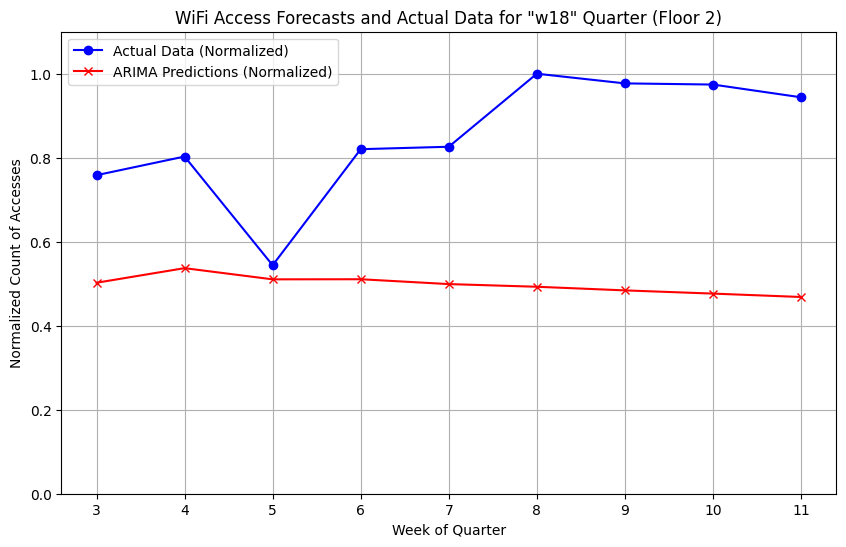

Quarter: s18 || Floor: 2
Mean Absolute Error (MAE): 0.13179923479362732
Mean Absolute Error (MAE) as percentage of mean: 14.46%
14.458736208791855


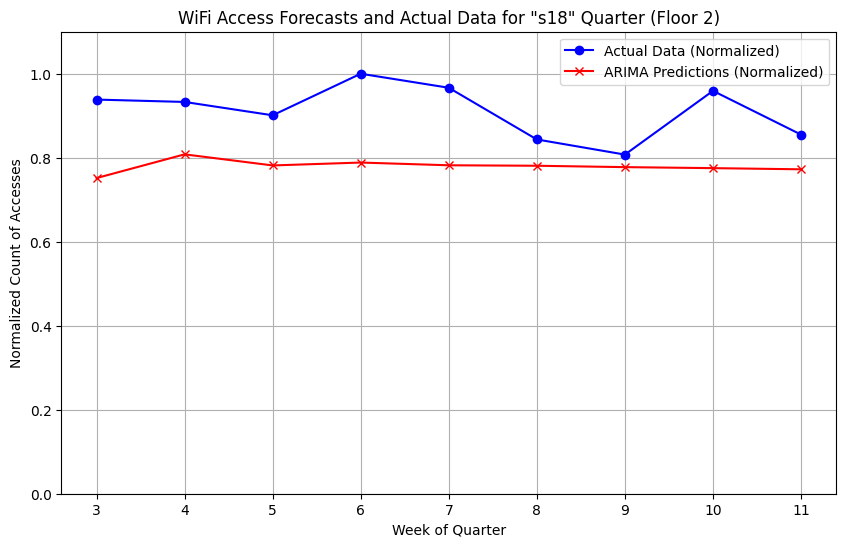

Quarter: f18 || Floor: 2
Mean Absolute Error (MAE): 0.5040756371089543
Mean Absolute Error (MAE) as percentage of mean: 70.00%
69.99527882353938


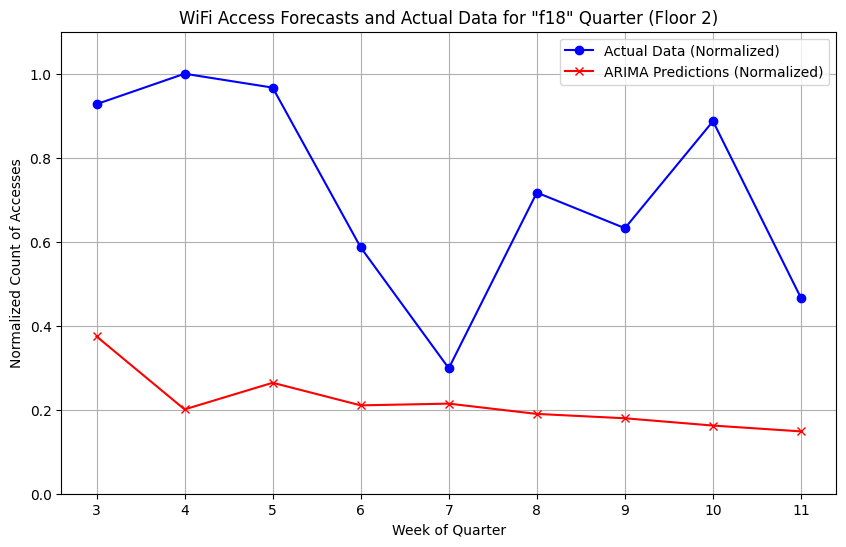

Quarter: w19 || Floor: 2
Mean Absolute Error (MAE): 0.12648638268062057
Mean Absolute Error (MAE) as percentage of mean: 17.01%
17.01086140373211


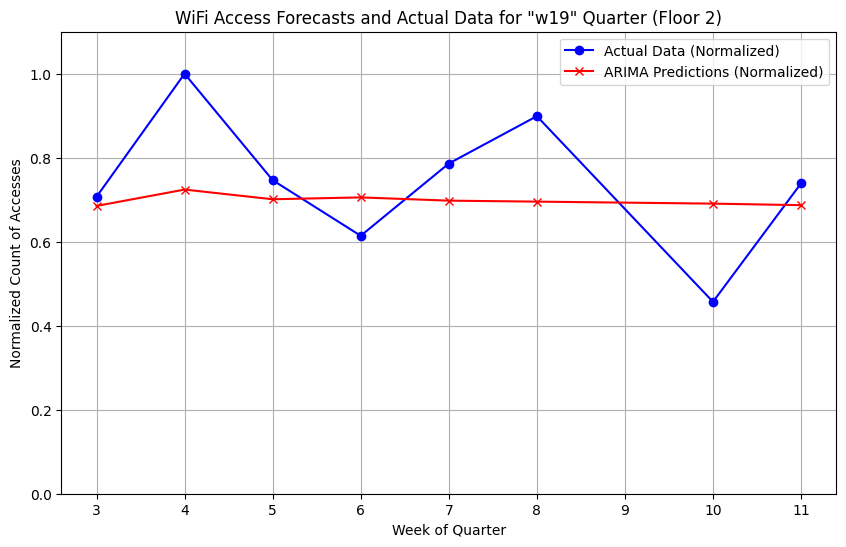

Quarter: w18 || Floor: 3
Mean Absolute Error (MAE): 0.203117374953601
Mean Absolute Error (MAE) as percentage of mean: 23.75%
23.7544393567021


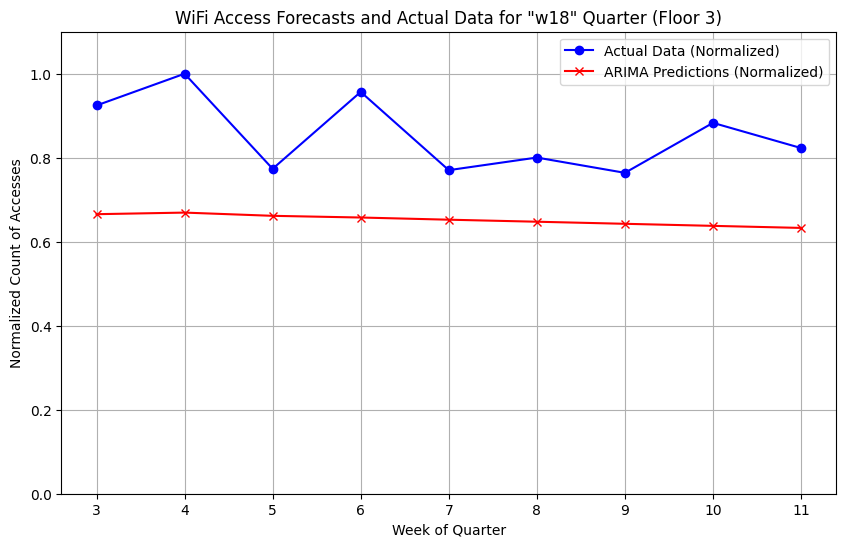

Quarter: s18 || Floor: 3
Mean Absolute Error (MAE): 0.09642863206959881
Mean Absolute Error (MAE) as percentage of mean: 11.74%
11.735484475000568


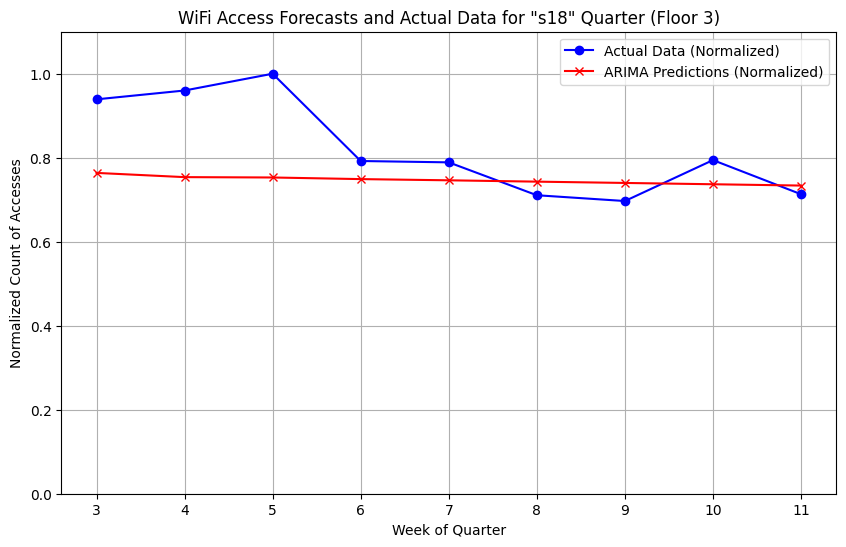

Quarter: f18 || Floor: 3
Mean Absolute Error (MAE): 0.5359661471621275
Mean Absolute Error (MAE) as percentage of mean: 81.47%
81.47136541062557


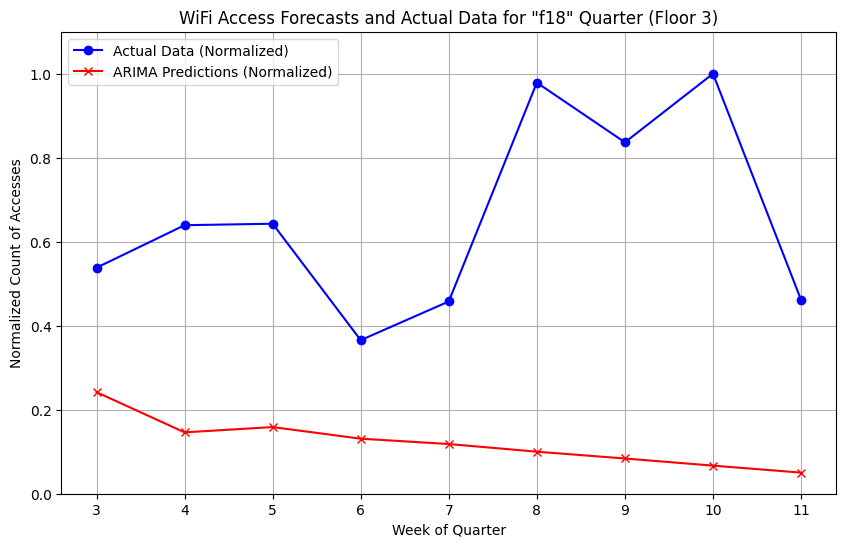

Quarter: w19 || Floor: 3
Mean Absolute Error (MAE): 0.17914247809487738
Mean Absolute Error (MAE) as percentage of mean: 23.86%
23.856660902700785


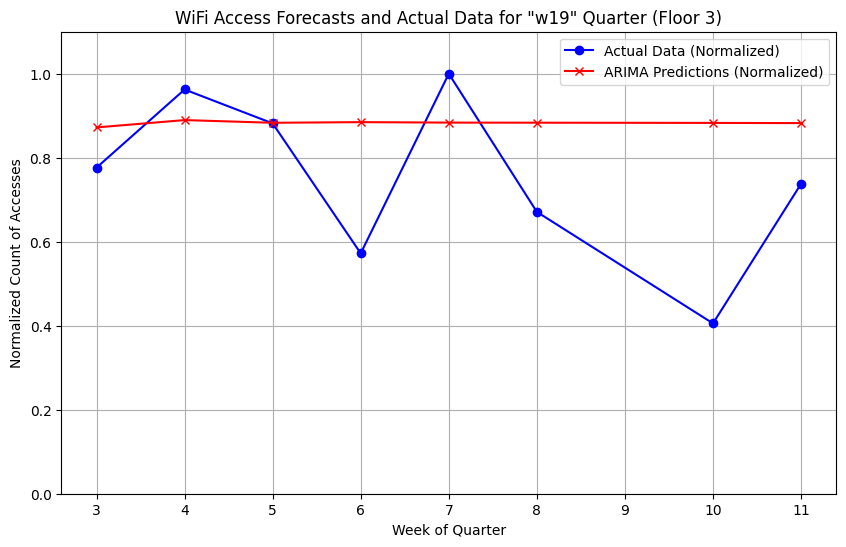

Quarter: w18 || Floor: 4
Mean Absolute Error (MAE): 0.24307125253559198
Mean Absolute Error (MAE) as percentage of mean: 42.68%
42.682254984145295


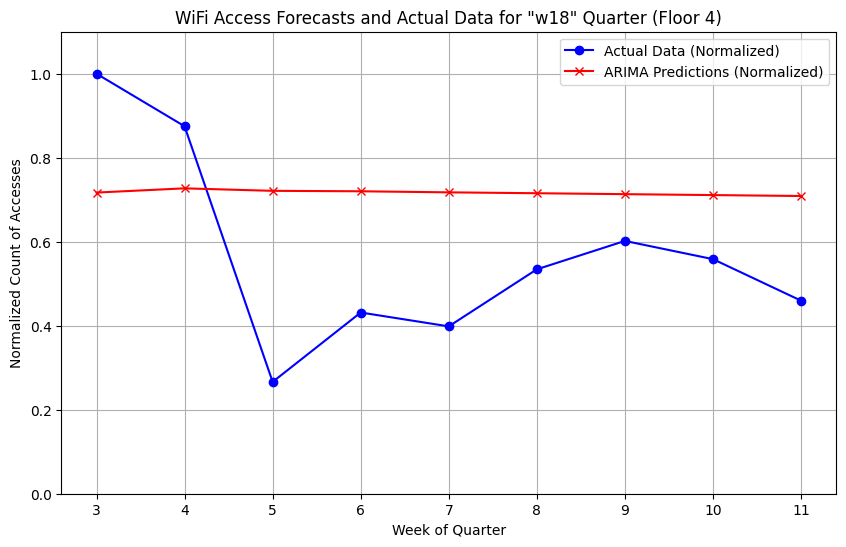

Quarter: s18 || Floor: 4
Mean Absolute Error (MAE): 0.2899955135667455
Mean Absolute Error (MAE) as percentage of mean: 34.26%
34.256933176883045


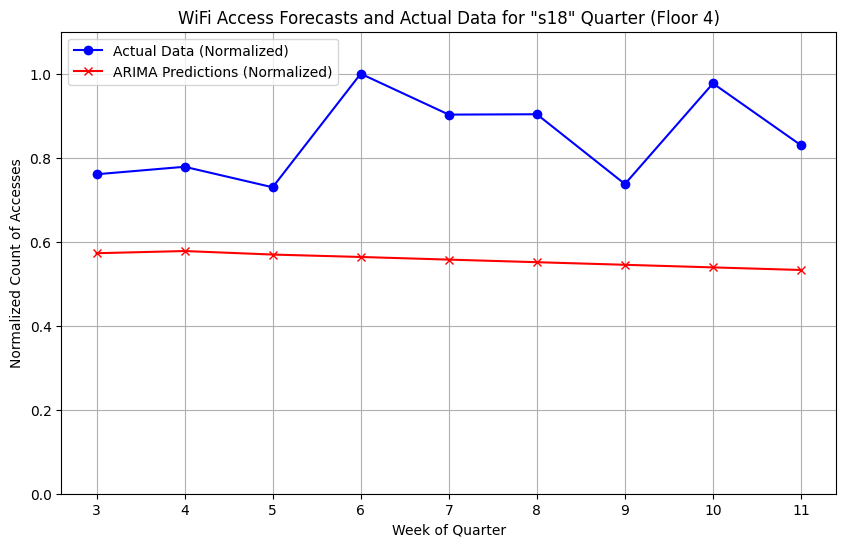

Quarter: f18 || Floor: 4
Mean Absolute Error (MAE): 0.596011807614756
Mean Absolute Error (MAE) as percentage of mean: 100.46%
100.45636795749189


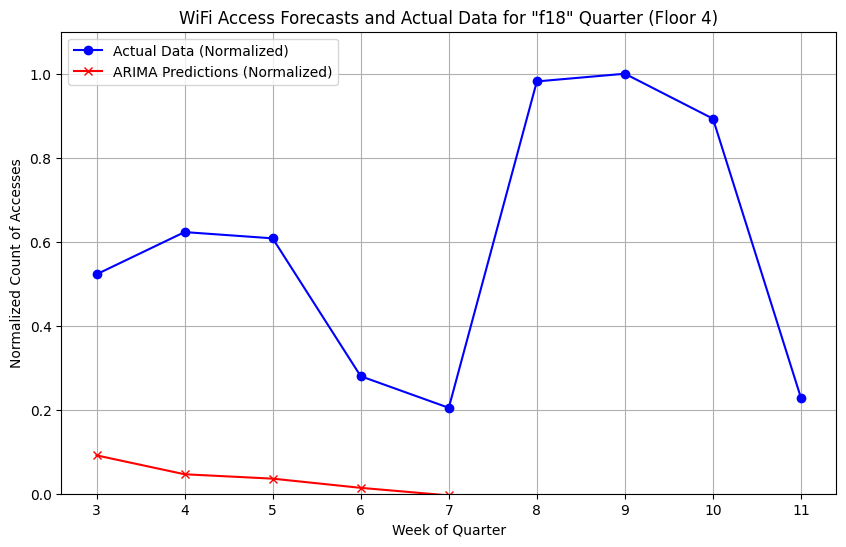

Quarter: w19 || Floor: 4
Mean Absolute Error (MAE): 0.15691952503983
Mean Absolute Error (MAE) as percentage of mean: 36.95%
36.950362382300035


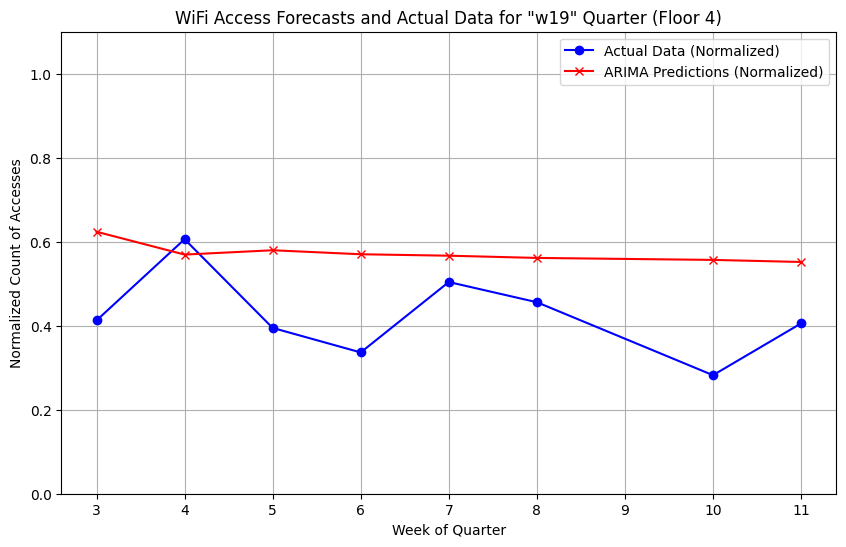

Quarter: w18 || Floor: 5
Mean Absolute Error (MAE): 0.13490229006771093
Mean Absolute Error (MAE) as percentage of mean: 16.20%
16.20442638249743


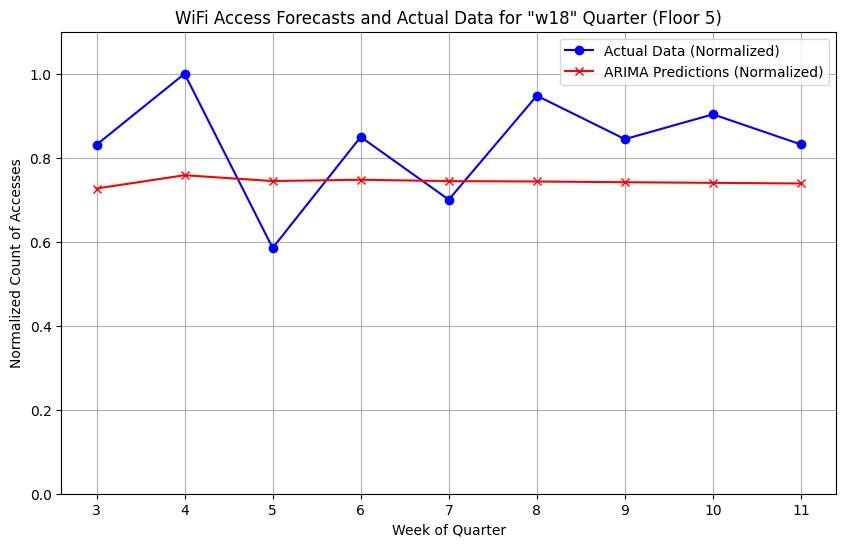

Quarter: s18 || Floor: 5
Mean Absolute Error (MAE): 0.15227003042674608
Mean Absolute Error (MAE) as percentage of mean: 17.30%
17.297226167427564


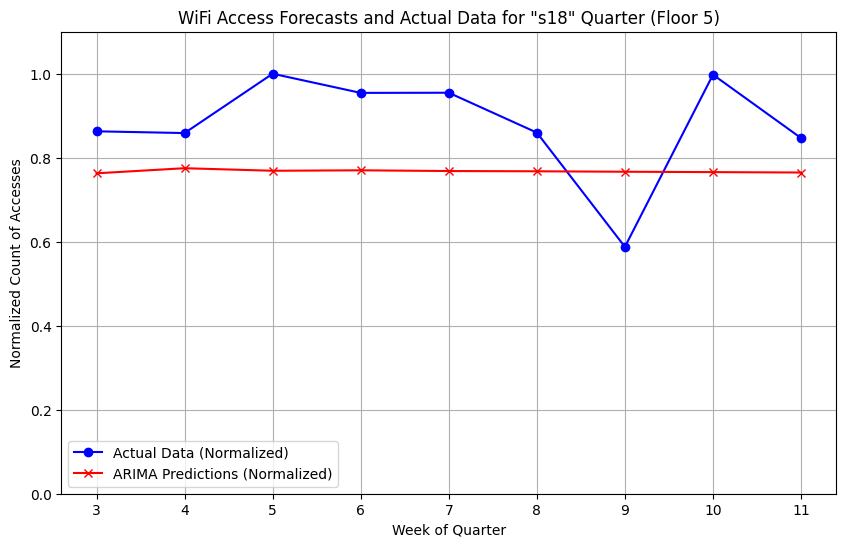

Quarter: f18 || Floor: 5
Mean Absolute Error (MAE): 0.6097479236434078
Mean Absolute Error (MAE) as percentage of mean: 88.90%
88.90033912327196


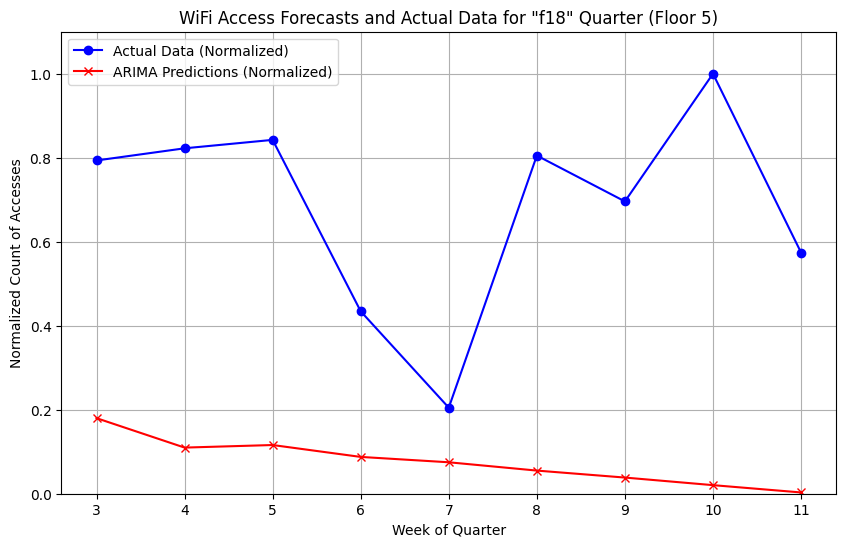

Quarter: w19 || Floor: 5
Mean Absolute Error (MAE): 0.13839127464988782
Mean Absolute Error (MAE) as percentage of mean: 20.32%
20.320351716772688


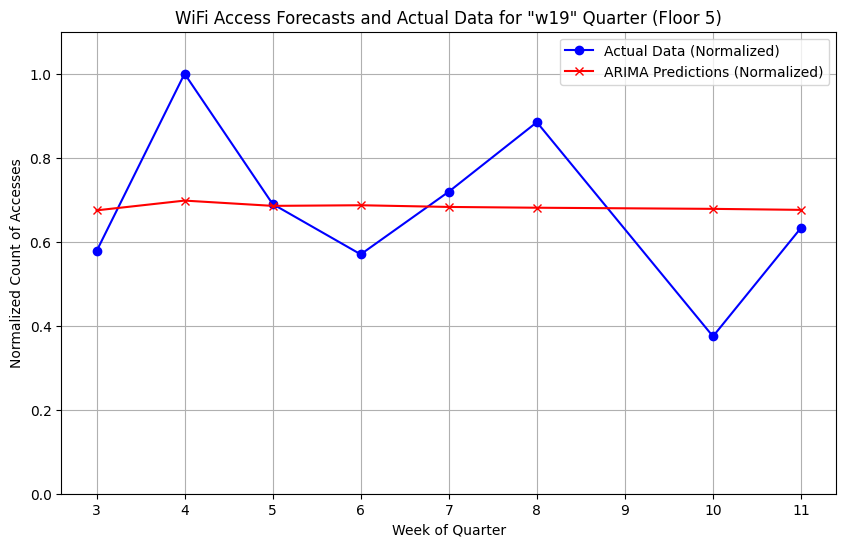

Quarter: w18 || Floor: 6
Mean Absolute Error (MAE): 0.3741882239821568
Mean Absolute Error (MAE) as percentage of mean: 47.99%
47.98575565448864


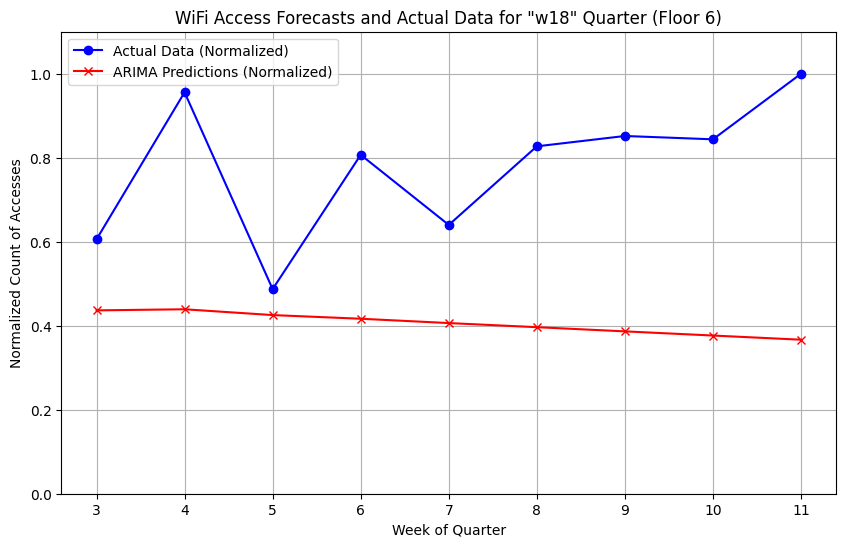

Quarter: s18 || Floor: 6
Mean Absolute Error (MAE): 0.07934015535634208
Mean Absolute Error (MAE) as percentage of mean: 9.40%
9.403007317883873


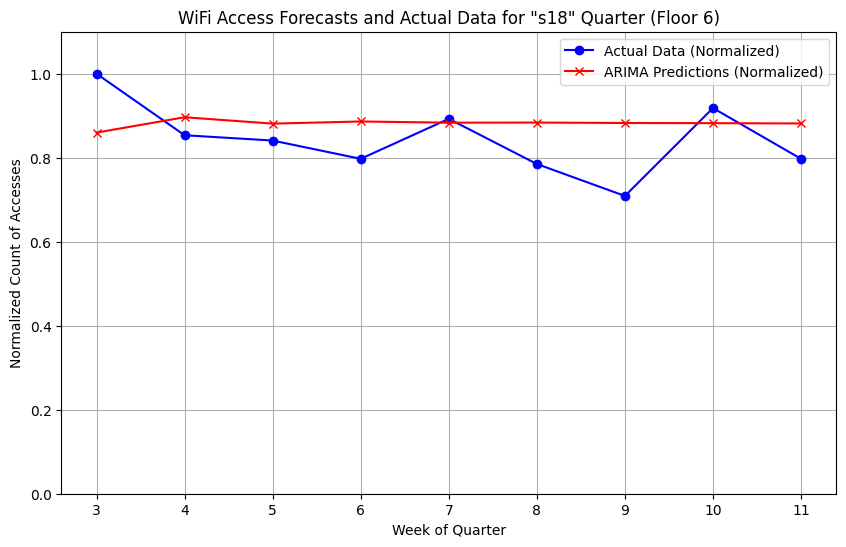

Quarter: f18 || Floor: 6
Mean Absolute Error (MAE): 0.4776499076828794
Mean Absolute Error (MAE) as percentage of mean: 75.19%
75.19476694566063


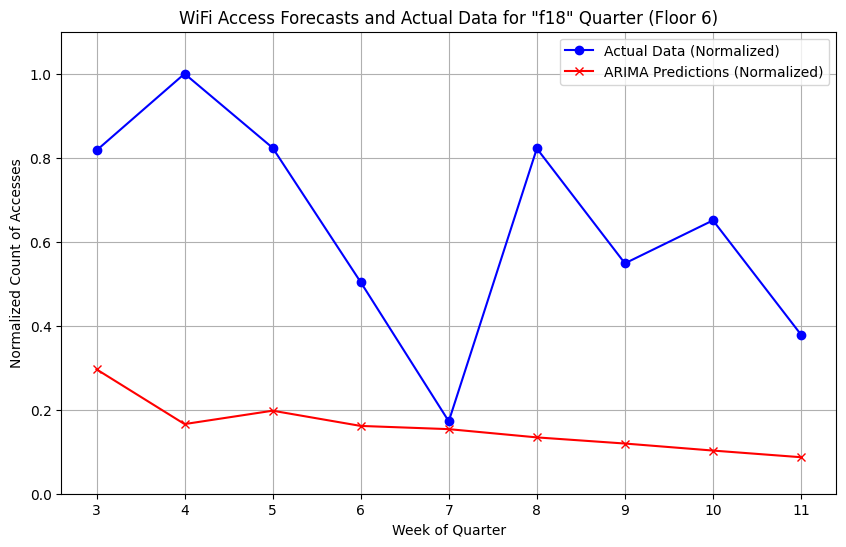

Quarter: w19 || Floor: 6
Mean Absolute Error (MAE): 0.09952581297798294
Mean Absolute Error (MAE) as percentage of mean: 13.80%
13.79961754431245


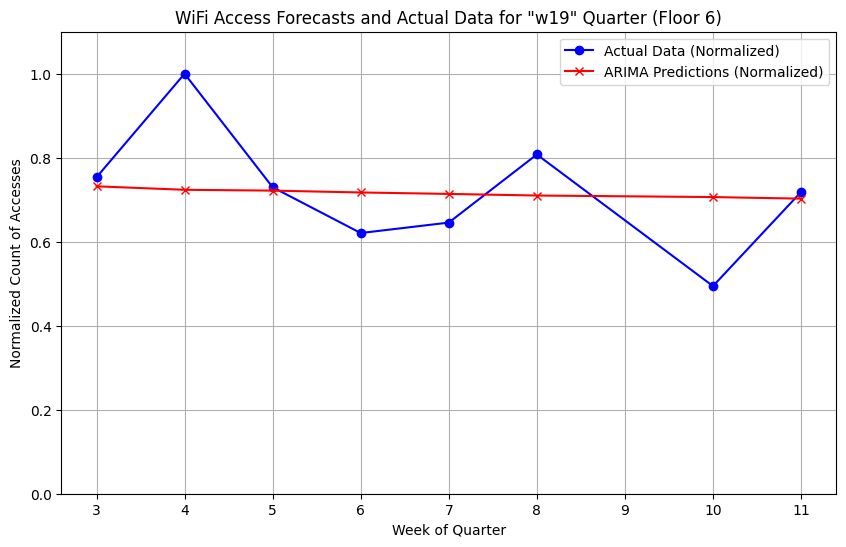

In [ ]:

# Function to create ARIMA model for forecasting
def predict_quarter_processed_arima(df, quarter_to_predict, train_quarters, floor=2, order=(1, 2, 1)):
    # Filter for floor
    df_floor = df[df['floor'] == floor]
    
    # Get counts per quarter
    df_floor = df_floor.groupby(['quarter', 'week_of_quarter']).size().reset_index(name='count')
    
    # Normalize
    df_floor = normalize_counts(df_floor)
    # Reset index
    df_floor.reset_index(drop=True, inplace=True)

    # Train and validation sets
    train_data = df_floor[df_floor['quarter'].isin(train_quarters)]
    validation_data = df_floor[df_floor['quarter'] == quarter_to_predict]
    # Reset indices
    train_data.reset_index(drop=True, inplace=True)
    validation_data.reset_index(drop=True, inplace=True)

    # Add first 2 weeks of predicted quarter to training set
    additional_train_data = validation_data[validation_data['week_of_quarter'] <= 2]
    # Reset index
    additional_train_data.reset_index(drop=True, inplace=True)

    combined_train_data = pd.concat([train_data, additional_train_data]).reset_index(drop=True)
    combined_train_data = combined_train_data.rename(columns={'week_of_quarter': 'ds', 'count_normalized': 'y'})
    
    # ARIMA Model
    model = ARIMA(combined_train_data['y'], order=order)
    model_fit = model.fit()
    
    # Validation
    test_data = validation_data[(validation_data['week_of_quarter'] > 2) & (validation_data['week_of_quarter'] <= 11)]
    
    # Predict on following weeks of quarter
    forecast_normalized = model_fit.forecast(steps=len(test_data))
    
    print(f'Quarter: {quarter_to_predict} || Floor: {floor}')
    # Errors
    mae_percentage = calculate_errors(test_data['count_normalized'], forecast_normalized)
    print(mae_percentage)

    # Plot
    plt.figure(figsize=(10, 6))
    plt.plot(test_data['week_of_quarter'], test_data['count_normalized'], label='Actual Data (Normalized)', color='blue', marker='o')
    plt.plot(test_data['week_of_quarter'], forecast_normalized, label='ARIMA Predictions (Normalized)', color='red', marker='x')

    plt.title(f'WiFi Access Forecasts and Actual Data for "{quarter_to_predict}" Quarter (Floor {floor})')
    plt.xlabel('Week of Quarter')
    plt.ylabel('Normalized Count of Accesses')
    plt.legend()
    plt.ylim(0.0, 1.1)  # Set y-axis limits
    plt.grid(True)
    plt.show()

    return mae_percentage

# Define a context manager to suppress warnings
with warnings.catch_warnings():
    # Suppress all warnings
    warnings.filterwarnings("ignore")
    
    quarters_no_break = ['w18', 's18', 'f18', 'w19']
    all_quarters = ['f17_break', 'f18', 'f18_break', 's18', 's18_break', 's19', 'summer17', 'summer17_break', 'summer18_break', 'w18', 'w18_break', 'w19', 'w19_break']
    # s19 has missing data for all floors
    # noninvertible s18 floor 3, 5
    # w18 hits 0 count from week 13+ for floor 6, why is floor 13+ shown instead of cut?
    mae_percentages = []
    for floor in [2, 3, 4, 5, 6]:
        for quarter in quarters_no_break:
            training_quarters = all_quarters.copy()
            training_quarters.remove(quarter) 
            mae_percentages.append(predict_quarter_processed_arima(df_processed_data3, quarter, training_quarters, floor))

# The warnings are restored outside of the context manager


In [ ]:


def predict_quarter_processed_arima(df, quarter_to_predict, train_quarters, floor=2, order=(1, 1, 1)):
    # Filter for floor
    df_floor = df[df['floor'] == floor]
    
    # Get counts per quarter
    df_floor = df_floor.groupby(['quarter', 'week_of_quarter']).size().reset_index(name='count')
    
    # Normalize
    df_floor = normalize_counts(df_floor)
    # Reset index
    df_floor.reset_index(drop=True, inplace=True)

    # Train and validation sets
    train_data = df_floor[df_floor['quarter'].isin(train_quarters)]
    validation_data = df_floor[df_floor['quarter'] == quarter_to_predict]
    # Reset indices
    train_data.reset_index(drop=True, inplace=True)
    validation_data.reset_index(drop=True, inplace=True)

    combined_train_data = train_data.reset_index(drop=True)
    combined_train_data = combined_train_data.rename(columns={'week_of_quarter': 'ds', 'count_normalized': 'y'})
    
    # ARIMA Model
    model = ARIMA(combined_train_data['y'], order=order)
    model_fit = model.fit()
    
    # Validation
    test_data = validation_data[(validation_data['week_of_quarter'] > 2) & (validation_data['week_of_quarter'] <= 11)]
    
    # Predict on following weeks of quarter
    forecast_normalized = model_fit.forecast(steps=len(test_data))
    
    print(f'Quarter: {quarter_to_predict} || Floor: {floor}')
    # Errors
    mae_percentage = calculate_errors(test_data['count_normalized'], forecast_normalized)
    print(mae_percentage)

    # Plot
    plt.figure(figsize=(10, 6))
    plt.plot(test_data['week_of_quarter'], test_data['count_normalized'], label='Actual Data (Normalized)', color='blue', marker='o')
    plt.plot(test_data['week_of_quarter'], forecast_normalized, label='ARIMA Predictions (Normalized)', color='red', marker='x')

    plt.title(f'WiFi Access Forecasts and Actual Data for "{quarter_to_predict}" Quarter (Floor {floor})')
    plt.xlabel('Week of Quarter')
    plt.ylabel('Normalized Count of Accesses')
    plt.legend()
    plt.ylim(0.0, 1.1)  # Set y-axis limits
    plt.grid(True)
    plt.show()

    return mae_percentage

# Define a context manager to suppress warnings
with warnings.catch_warnings():
    warnings.filterwarnings("ignore")
    
    quarters_no_break = ['w18', 's18', 'f18', 'w19']
 


In [ ]:
# import pandas as pd
# import numpy as np
# from statsmodels.tsa.arima.model import ARIMA
# import matplotlib.pyplot as plt
# import warnings

# # Function to create ARIMA model for forecasting
# def predict_quarter_processed_arima(df, quarter_to_predict, train_quarters, floor=2, order=(1, 2, 1)):
#     # Filter for floor
#     df_floor = df[df['floor'] == floor]
    
#     # Get counts per quarter
#     df_floor = df_floor.groupby(['quarter', 'week_of_quarter']).size().reset_index(name='count')
    
#     # Normalize
#     df_floor = normalize_counts(df_floor)
#     # Reset index
#     df_floor.reset_index(drop=True, inplace=True)

#     # Train and validation sets
#     train_data = df_floor[df_floor['quarter'].isin(train_quarters)]
#     validation_data = df_floor[df_floor['quarter'] == quarter_to_predict]
#     # Reset indices
#     train_data.reset_index(drop=True, inplace=True)
#     validation_data.reset_index(drop=True, inplace=True)

#     # Add first 2 weeks of predicted quarter to training set
#     additional_train_data = validation_data[validation_data['week_of_quarter'] <= 2]
#     # Reset index
#     additional_train_data.reset_index(drop=True, inplace=True)

#     combined_train_data = pd.concat([train_data, additional_train_data]).reset_index(drop=True)
#     combined_train_data = combined_train_data.rename(columns={'week_of_quarter': 'ds', 'count_normalized': 'y'})
    
#     # ARIMA Model
#     model = ARIMA(combined_train_data['y'], order=order)
#     model_fit = model.fit()
    
#     # Validation
#     test_data = validation_data[(validation_data['week_of_quarter'] > 2) & (validation_data['week_of_quarter'] <= 11)]
    
#     # Predict on following weeks of quarter
#     forecast_normalized = model_fit.forecast(steps=len(test_data))
    
#     print(f'Quarter: {quarter_to_predict} || Floor: {floor}')
#     # Errors
#     mae_percentage = calculate_errors(test_data['count_normalized'], forecast_normalized)
#     print(mae_percentage)

#     # Plot
#     plt.figure(figsize=(10, 6))
#     plt.plot(test_data['week_of_quarter'], test_data['count_normalized'], label='Actual Data (Normalized)', color='blue', marker='o')
#     plt.plot(test_data['week_of_quarter'], forecast_normalized, label='ARIMA Predictions (Normalized)', color='red', marker='x')

#     plt.title(f'WiFi Access Forecasts and Actual Data for "{quarter_to_predict}" Quarter (Floor {floor})')
#     plt.xlabel('Week of Quarter')
#     plt.ylabel('Normalized Count of Accesses')
#     plt.legend()
#     plt.ylim(0.0, 1.1)  # Set y-axis limits
#     plt.grid(True)
#     plt.show()

#     return mae_percentage

# with warnings.catch_warnings():
#     warnings.filterwarnings("ignore")
    
#     quarters_no_break = ['w18', 's18', 'f18', 'w19']
#     all_quarters = ['f17_break', 'f18', 'f18_break', 's18', 's18_break', 's19', 'summer17', 'summer17_break', 'summer18_break', 'w18', 'w18_break', 'w19', 'w19_break']
#     # s19 has missing data for all floors
#     # noninvertible s18 floor 3, 5
#     # w18 hits 0 count from week 13+ for floor 6, why is floor 13+ shown instead of cut?
#     mae_percentages = []
#     for floor in [2, 3, 4, 5, 6]:
#         for quarter in quarters_no_break:
#             training_quarters = all_quarters.copy()
#             training_quarters.remove(quarter) 
#             mae_percentages.append(predict_quarter_processed_arima(df_processed_data3, quarter, training_quarters, floor))



In [ ]:
plot_acf_pacf(combined_train_data['y'])